In [2]:
!pip install matplotlib
!pip install -U scikit-learn
!pip install -U setuptools setuptools_scm pep517
!pip install -U emcee
!pip install chainconsumer

In [1]:
import math
import random
import time
from math import exp
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from matplotlib import ticker
from numpy import *
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn import preprocessing, metrics

from Bayesneuralnet_regcls import MCMC, Network, scikit_linear_mod
from convergence_test import gelman_rubin

In [2]:
def squared_error(prediction, actual):
    return (
        np.sqrt(np.sum(np.square(prediction - actual)) / prediction.shape[0])
    ) 

In [3]:
def accuracy(prediction, actual):
    count = 0
    for i in range(prediction.shape[0]):
        if prediction[i] == actual[i]:
            count += 1
    return 100 * count/prediction.shape[0]

In [4]:
def get_dataset_details(problem):

    w_limit =  0.025 # step size for w
    tau_limit = 0.2 # step size for eta
    save = True
    name = ""
    
    
    
    if problem == "Lazer":
        # problem 1
        data = np.genfromtxt('data/Lazer/Lazer_processed.csv',delimiter=',')
        #traindata = np.loadtxt("data/Lazer/train.txt")
        #testdata = np.loadtxt("data/Lazer/test.txt")  #
        name = "Lazer"
        hidden = 5
        input = 4  
        output = 1
        prob_type = 'regression'
        numSamples = 50000 
        #numSamples = 500
        train_ratio = 0.6
                
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
        
    elif problem == "Sunspot":
        # problem 2
        data = np.genfromtxt('data/Sunspot/Sunspots.csv',delimiter=',')
        #traindata = np.loadtxt("data/Sunspot/train.txt")
        #testdata = np.loadtxt("data/Sunspot/test.txt")  #
        name = "Sunspot"
        hidden = 5
        input = 4  #
        output = 1
        prob_type = 'regression' 
        numSamples = 50000 
        
        train_ratio = 0.6
                
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]

    
    elif problem == "abalone":
        # abalone
        data = np.genfromtxt('data/abalone/abalone.csv',delimiter=',')
        name = "abalone"
        hidden = 12
        input = 8 #input
        output = 1
        train_ratio = 0.6

        
        
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        data = scaler.transform(data)
        traindata = data[: int(train_ratio * data.shape[0])]
        testdata = data[int(train_ratio * data.shape[0]): ]

        
        prob_type = 'regression' 
        numSamples = 50000
        #numSamples = 200
    
    elif problem == "Iris":
        # problem 4
        data  = np.genfromtxt('data/iris.csv',delimiter=';')
        classes = data[:,4].reshape(data.shape[0],1)-1
        features = data[:,0:4]#Normalizing Data
    
        name = "Iris"
        hidden = 12
        input = 4 #input
        output = 3
    
        for k in range(input):
            mean = np.mean(features[:,k])
            dev = np.std(features[:,k])
            features[:,k] = (features[:,k]-mean)/dev
            train_ratio = 0.6 #choose
            indices = np.random.permutation(features.shape[0])
            traindata = np.hstack([features[indices[:int(train_ratio*features.shape[0])],:],classes[indices[:int(train_ratio*features.shape[0])],:]])
            testdata = np.hstack([features[indices[int(train_ratio*features.shape[0])]:,:],classes[indices[int(train_ratio*features.shape[0])]:,:]])
            prob_type = 'classification'
        numSamples = 50000 
        
    elif problem == "Ionosphere":
        # problem 5
        data = np.genfromtxt('data/ionesphere/ionosphere.csv',delimiter=',')
        print(data)
        
        #traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
        #testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
        
        name = "Ionosphere"
        hidden = 50
        input = 34 #input
        output = 2
        prob_type = 'classification'
        numSamples = 50000

        train_ratio = 0.6
        
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
        
    elif problem == "abalone_classification":
        # abalone classification
        data = np.genfromtxt('data/abalone_classification/abalone_classification.csv',delimiter=',')
        name = "abalone_classification"
        hidden = 12
        input = 8 #input
        output = 4
        train_ratio = 0.6

        
        
        np.random.shuffle(data)
        
        traindata = data[: int(train_ratio * data.shape[0])]
        testdata = data[int(train_ratio * data.shape[0]): ]

        
        prob_type = 'classification' 
        numSamples = 50000
        #numSamples = 200

    elif problem == "exp_325":
        # exp_325
        
        name = "exp_325"
        hidden = 8
        input = 3 #input
        output = 6
        
        
        prob_type = 'classification' 
        numSamples = 50000

        x_train, x_test, y_train, y_test = read_preprocess_data("data/exp_325/Unbalanced_325.csv")
        #numSamples = 200
        traindata = np.concatenate((x_train, y_train[:, np.newaxis]), axis=1)
        testdata = np.concatenate((x_test, y_test[:, np.newaxis]), axis=1)

    elif problem == "exp_310":
        # exp_310
        
        name = "exp_310"
        hidden = 8
        input = 3 #input
        output = 6
        
        
        prob_type = 'classification' 
        numSamples = 50000

        x_train, x_test, y_train, y_test = read_preprocess_data("data/exp_310/Unbalanced_310.csv")
        #numSamples = 200
        traindata = np.concatenate((x_train, y_train[:, np.newaxis]), axis=1)
        testdata = np.concatenate((x_test, y_test[:, np.newaxis]), axis=1)
        
    

    return traindata,testdata, prob_type, [input,hidden,output],numSamples

In [5]:
def histogram_trace(pos_points, fname = None):
    '''
    This function will create a histogram and traceplot of the MCMC results.
    ''' 
    size = 15

    plt.tick_params(labelsize=size)
    params = {'legend.fontsize': size, 'legend.handlelength': 2}
    plt.rcParams.update(params)
    plt.grid(alpha=0.75)

    plt.hist(pos_points,  bins = 20, color='#0504aa', alpha=0.7)   
    plt.title("Posterior distribution ", fontsize = size)
    plt.xlabel(' Parameter value  ', fontsize = size)
    plt.ylabel(' Frequency ', fontsize = size) 
    plt.tight_layout()
    if not fname is None: 
        plt.savefig(fname + '_posterior.png')
        plt.clf()
    else:
        plt.show()
        
    plt.tick_params(labelsize=size)
    params = {'legend.fontsize': size, 'legend.handlelength': 2}
    plt.rcParams.update(params)
    plt.grid(alpha=0.75) 
    plt.plot(pos_points)   

    plt.title("Parameter trace plot", fontsize = size)
    plt.xlabel(' Number of Samples  ', fontsize = size)
    plt.ylabel(' Parameter value ', fontsize = size)
    plt.tight_layout()
    if not fname is None:
        plt.savefig(fname + '_trace.png') 
        plt.clf()
    else:
        plt.show()

In [6]:
def plot_performance():
    return
    

In [7]:

def prune(name,traindata, testdata, problem_type, network_structure, folder):
    results_folder = folder + name 
    
    error_type = ""
    pos_weights = []
    resultstn = []
    resultspn = []
    resultrand = []
    count = 1
    #pos_weights = np.array(pos_weights)
    
    figs, axs = plt.subplots(1,3, figsize=(15,3), sharey=True)
    figs2, axs2 =  plt.subplots(4,3, figsize=(15,10), sharey=True)
    for p_w in os.listdir(results_folder):
        if p_w.startswith("pos_w") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
            # Prints only text file present in My Folder
            print(p_w)
            
            w = np.loadtxt(results_folder+ "\\"+p_w)

        
            if count == 3:
                print(count)
                #break
                
                
            signal_to_noise = np.empty(w.shape[1])
            signal_plus_noise = np.empty(w.shape[1])
            random_noise = np.empty(w.shape[1])
            
            for i in range(w.shape[1]):
                signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
                signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])
                random_noise[i] = np.random.random()
        
            bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)
            mse_bnn = np.empty(w.shape[0])
            
            
            
            sorted_index = np.argsort(signal_to_noise)
            sorted_index_spn = np.argsort(signal_plus_noise)
            
            new_pos = np.copy(w)
            new_pos_spn = np.copy(w)
            new_pos_random = np.copy(w)
    
            plotter = 0
            graph_counter = 0

            print(int(0.75*sorted_index.shape[0]))
            
            prunn_limit = math.ceil(0.75*sorted_index.shape[0])

            mse_list = np.empty(prunn_limit)
            mse_list_spn = np.empty(prunn_limit)
            mse_list_rand = np.empty(prunn_limit)

            
            for j in range(prunn_limit):
                
                mse_bnn = np.empty(w.shape[0])
                new_pos[:, sorted_index[j]] = 0
                fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
                
        
                mse_bnn_spn = np.empty(w.shape[0])
                new_pos_spn[:, sorted_index_spn[j]] = 0 
                fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
                
        
                ##############
                mse_bnn_rand = np.empty(w.shape[0])
                new_pos_random[:, j] = 0
                fx_rand, prob_rand = bnn_model.evaluate_proposal(testdata, new_pos_random.mean(axis=0))
            
                if problem_type == "regression":
                    #print("Regression")
                    error_type = "RMSE"
                    mse_bnn = squared_error(fx, testdata[:, -1])
                    mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
                    mse_bnn_rand = squared_error(fx_rand, testdata[:, -1])
                else:
                    #print("Classification")
                    error_type = "Accuracy"
                    mse_bnn = accuracy(fx, testdata[:, -1])
                    mse_bnn_spn = accuracy(fx_spn, testdata[:, -1])
                    mse_bnn_rand = accuracy(fx_rand, testdata[:, -1])

       
                    
                
                if j == int(plotter * sorted_index.shape[0]):
                    #plt.figure(figsize=(10,3))
                    axs2[graph_counter,0].plot(fx,'-g', label = 'STN',  alpha=0.3)
                    axs2[graph_counter,1].plot(fx_spn,'-b', label = 'SPN',  alpha=0.3) 
                    axs2[graph_counter,2].plot(fx_rand,'-m', label = 'Random',  alpha=0.3)

                    axs2[graph_counter,0].plot(testdata[:, -1],'-k', label = 'Actual',alpha=0.5)
                    axs2[graph_counter,1].plot(testdata[:, -1],'-k', label = 'Actual',alpha=0.5)
                    axs2[graph_counter,2].plot(testdata[:, -1],'-k', label = 'Actual', alpha=0.5)
                    
                    plotter += 0.25
                    graph_counter += 1
                #plt.legend()
                    
                
                mse_list[j] = round(np.mean(mse_bnn), 10)
                mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
                mse_list_rand[j] = round(np.mean(mse_bnn_rand), 10)

            outres_db = open(results_folder + '/stn_perf_list.txt',"a+")
            outres_db.write( ','.join(map(str, mse_list)) + "\n")

            outres_db = open(results_folder + '/spn_perf_list.txt',"a+")
            outres_db.write( ','.join(map(str, mse_list_spn)) + "\n")
            
            outres_db = open(results_folder + '/rand_perf_list.txt',"a+")
            outres_db.write( ','.join(map(str, mse_list_rand)) + "\n")
             
            figs2.savefig(folder+ name+'_predictions.svg')
            #plt.clf()

            print("mse BNN")
            print(mse_bnn)
            #print(np.unique(fx[-2:]))
            #print(np.unique(testdata[-2:, -1]))
            #print(np.sqrt(mean_squared_error(fx, testdata[:, -1])))
            
            print('signal to noise: ')  
            print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
            print(np.percentile(signal_to_noise, 0), 
                  np.percentile(signal_to_noise, 10), 
                  np.percentile(signal_to_noise, 25), 
                  np.percentile(signal_to_noise, 50),
                  np.percentile(signal_to_noise, 75))
                  
            print('signal plus noise: ')
            print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
            print(np.percentile(signal_plus_noise, 0), 
                  np.percentile(signal_plus_noise, 10), 
                  np.percentile(signal_plus_noise, 25), 
                  np.percentile(signal_plus_noise, 50),
                  np.percentile(signal_plus_noise, 75))
            
            print('random  prunning ')
            print(f"{mse_list_rand[0] : .3g} & {mse_list_rand[int(mse_list_rand.shape[0] * 0.1)] : .3g} & {mse_list_rand[int(mse_list_rand.shape[0] * 0.25)] : .3g} & {mse_list_rand[int(mse_list_rand.shape[0] * 0.5)] : .3g} & {mse_list_rand[int(mse_list_rand.shape[0] * 0.75)] : .3g}")
            print(np.percentile(random_noise, 0), 
                  np.percentile(random_noise, 10), 
                  np.percentile(random_noise, 25), 
                  np.percentile(random_noise, 50),
                  np.percentile(random_noise, 75))
    
            
            resultstn.append(mse_list)
            resultspn.append(mse_list_spn)
            resultrand.append(mse_list_rand)
            
            axs[0].plot(mse_list, '--g',  alpha=0.15)
            axs[1].plot(mse_list_spn,'--b',  alpha=0.15)
            axs[2].plot(mse_list_rand,'--m',  alpha=0.15)
            # plt.legend()
            # plt.xlabel('number of weights removed')
            # plt.ylabel('MSE')
            count = count + 1
            # plt.savefig('result/' + name + "/signal_plus" + str(count))

    
    figs.suptitle((name +' Dataset').upper(), fontsize=16)
    
    num_ticks = prunn_limit  # Length of the data (assuming all results arrays are the same length)
    
    axs[0].plot(np.asarray(resultstn).mean(axis=0), '-g', alpha=1, label= error_type+" signal to noise'")
    axs[0].fill_between(range(len(resultstn[0])) , np.asarray(resultstn).max(axis=0),np.asarray(resultstn).min(axis=0), alpha=0.05, color='green' )
    #axs[0].grid()
    axs[0].set_ylabel(error_type)
    
    axs[0].set_xticks([0, num_ticks * 0.33, num_ticks * 0.66, num_ticks* 0.95 ])
    axs[0].set_xticklabels(['0%', '25%', '50%', '75%'])
    # Set the x-axis limit to 75%
    axs[0].set_xlim(0, num_ticks)
    #axs[0].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(resultstn[0])-1))
    
    axs[1].plot(np.asarray(resultspn).mean(axis=0), '-b', alpha=1, label= error_type + " signal plus noise'")
    axs[1].fill_between(range(len(resultspn[0])) , np.asarray(resultspn).max(axis=0),np.asarray(resultspn).min(axis=0), alpha=0.05, color='blue' )
    #axs[1].grid()
    #axs[1].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(resultspn[0])-1))
    axs[1].set_xticks([0, num_ticks * 0.33, num_ticks * 0.66, num_ticks* 0.95 ])
    axs[1].set_xticklabels(['0%', '25%', '50%', '75%'])
    # Set the x-axis limit to 75%
    axs[1].set_xlim(0, num_ticks)
    
    axs[2].plot(np.asarray(resultrand).mean(axis=0), '-r', alpha=1, label= error_type + " random'")
    axs[2].fill_between(range(len(resultrand[0])) , np.asarray(resultrand).max(axis=0),np.asarray(resultrand).min(axis=0), alpha=0.05, color='magenta' )
    #axs[2].grid()
    #axs[2].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(resultrand[0])-1))
    axs[2].set_xticks([0, num_ticks * 0.33, num_ticks * 0.66, num_ticks* 0.95 ])
    axs[2].set_xticklabels(['0%', '25%', '50%', '75%'])
    # Set the x-axis limit to 75%
    axs[2].set_xlim(0, num_ticks)
    
    figs.savefig(folder+ name+'_std.svg')
    
    
    fig, ax = plt.subplots(1,1, figsize=(10,3))
    ax.plot(np.asarray(resultstn).mean(axis=0)[:], '-g', alpha=1, label= " signal to noise")
    ax.plot(np.asarray(resultspn).mean(axis=0), '-b', alpha=1, label=" signal plus noise")
    ax.plot(np.asarray(resultrand).mean(axis=0), '-m', alpha=1, label=" random")
    #ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(resultstn[0])-1))
    # Setting the x-ticks at 25% intervals
    
    ax.set_xticks([0, num_ticks * 0.33, num_ticks * 0.66, num_ticks * 0.95])
    ax.set_xticklabels(['0%', '25%', '50%', '75%'])
    # Set the x-axis limit to 75%
    ax.set_xlim(0, num_ticks)

    #ax.grid()
    ax.set_ylabel(error_type)
    fig.legend(loc='upper right')
    # plt.clf()
    fig.savefig(folder + name +'_plot.svg')
    




In [8]:
def read_preprocess_data(filename):
    
    #df = pd.read_csv("data/exp_325/Unbalanced_325.csv")
    df = pd.read_csv(filename)

    df_filtered = df[["Bulk","Porosity", "Resistivity"]]
    print(df_filtered.describe())

    

    normalize = True

    if normalize:


        #Use minmax normalization to get data in 0-1 rnage for lstm model
        x = df_filtered.values #returns a numpy array of the data frame
        min_max_scaler = MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        
        
        # Splitting data in traning and testting set
        all_data = pd.DataFrame(x_scaled).values


    else:
        all_data = df_filtered.values
        


    encoded_labels = df[["Species"]]
    
    le = preprocessing.LabelEncoder()
    
    encoded_labels =  le.fit_transform(encoded_labels)
    labels = list(le.classes_)


    balance_data = False
    if balance_data:
        resample = NeighbourhoodCleaningRule()
        all_data, encoded_labels = resample.fit_resample(all_data, encoded_labels)

    
    desc_data = False
    if desc_data:

        counter = Counter(encoded_labels)

        for k,v in counter.items():
            per = v / len(encoded_labels) * 100
            print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

        #plt.bar(counter.keys(), counter.values())
        plt.bar(labels, counter.values())
        plt.xticks(rotation = 30)
        
        #encoded_labels.value_counts().plot(kind='bar')
        #plt.show()

    
    x_train, x_test, y_train, y_test = train_test_split(all_data, encoded_labels, test_size=0.4, shuffle=True)

    return x_train, x_test, y_train, y_test

In [9]:
# Define the function to handle each experimental run for a given problem
def run_experiment(args):
    name,pruning_method, run_num, traindata, testdata, problem_type, network_structure,numSamples, starting_w, results_folder = args

    

    #(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )
    
    numSamples = 1000
    
    topology = network_structure

    use_langevin_gradients = True
    l_prob = 0.5
    learn_rate = 0.01
    w_limit = 0.025  # step size for w
    tau_limit = 0.2  # step size for eta
    save = True

    timer = time.time()

    print(f'Started sampling for problem {dataset}  at time {timer}')
    # Placeholder for MCMC class
    mcmc = MCMC(use_langevin_gradients, l_prob, learn_rate, numSamples, traindata, testdata, topology, problem_type)

    [pos_w, pos_tau, fx_train, fx_test, x_train, x_test, p_train, p_test, accept_ratio] = mcmc.re_sampler(w_limit, tau_limit, starting_w)

    print(f'Successfully sampled for problem {name} run {run_num}')

    burnin = 0 * numSamples
    timer2 = time.time()
    timetotal = (timer2 - timer) / 60
    print(f"{timetotal} min taken")

    pos_w = pos_w[int(burnin):, ]

    '''
    pos_tau = pos_tau[int(burnin):, ]

    fx_mu = fx_test[int(burnin):, ].mean(axis=0)
    fx_high = np.percentile(fx_test[int(burnin):, ], 95, axis=0)
    fx_low = np.percentile(fx_test[int(burnin):, ], 5, axis=0)

    fx_mu_tr = fx_train[int(burnin):, ].mean(axis=0)
    fx_high_tr = np.percentile(fx_train[int(burnin):, ], 95, axis=0)
    fx_low_tr = np.percentile(fx_train[int(burnin):, ], 5, axis=0)

    pos_w_mean = pos_w.mean(axis=0)

    p_tr = np.mean(p_train[int(burnin):])
    ptr_std = np.std(p_train[int(burnin):])
    p_tes = np.mean(p_test[int(burnin):])
    ptest_std = np.std(p_test[int(burnin):])
    #print(p_tr, ptr_std, p_tes, ptest_std)
    '''
    
    if save:
        np.savetxt(f'{results_folder}/pos_r_{pruning_method}_{run_num}.txt', pos_w)
        #with open(f'{results_folder}/pos_w_resample_{pruning_method}_{run_num}_result.txt', "a+") as outres_db:
        #    outres_db.write(f"{use_langevin_gradients}, {learn_rate}, {p_tr}, {ptr_std}, {p_tes}, {ptest_std}, {accept_ratio}, {timetotal}\n")

        #np.savetxt(f'{results_folder}/checkpoint.txt', np.asarray([problem, run_num]).astype(int))

    '''
    ytestdata = testdata[:, topology[0]]
    ytraindata = traindata[:, topology[0]]

    if problem_type == 'regression':
        print('---RMSE train---')
        print('mean', mcmc.rmse(ytraindata, fx_mu_tr))
        #print('high', mcmc.rmse(ytraindata, fx_high_tr))
        #print('low', mcmc.rmse(ytraindata, fx_low_tr))
        print('---RMSE test---')
        print('mean', mcmc.rmse(ytestdata, fx_mu))
        #print('high', mcmc.rmse(ytestdata, fx_high))
        #print('low', mcmc.rmse(ytestdata, fx_low))
    else:
        print('---accuracy train---')
        print('mean', mcmc.accuracy(ytraindata, fx_mu_tr))
        #print('high', mcmc.accuracy(ytraindata, fx_high_tr))
        #print('low', mcmc.accuracy(ytraindata, fx_low_tr))
        print('---accuracy test---')
        print('mean', mcmc.accuracy(ytestdata, fx_mu))
        #print('high', mcmc.accuracy(ytestdata, fx_high))
        #print('low', mcmc.accuracy(ytestdata, fx_low))
    '''

In [10]:

def prune_retrain(name,traindata, testdata, problem_type, network_structure,numSamples, folder):
    results_folder = folder + name 
    
    count = 1
    #pos_weights = np.array(pos_weights)
    
   
    
    for p_w in os.listdir(results_folder):
        if p_w.startswith("pos_w") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
            # Prints only text file present in My Folder
            print(p_w)
            
            w = np.loadtxt(results_folder+ "\\"+p_w)

        
            if count == 2:
                print(count)
                #return
                
                
            signal_to_noise = np.empty(w.shape[1])
            signal_plus_noise = np.empty(w.shape[1])
            random_noise = np.empty(w.shape[1])
            
            for i in range(w.shape[1]):
                signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
                signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])
                random_noise[i] = np.random.random()
        
            
            
            bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)
            
            sorted_index = np.argsort(signal_to_noise)
            sorted_index_spn = np.argsort(signal_plus_noise)
            
            new_pos = np.copy(w)
            new_pos_spn = np.copy(w)
            new_pos_random = np.copy(w)
    
            for prun_percent in [0.25 ,0.50, 0.75]:           
                prunn_limit = math.ceil(prun_percent*sorted_index.shape[0])
    
                mse_list = np.empty(prunn_limit)
                mse_list_spn = np.empty(prunn_limit)
                mse_list_rand = np.empty(prunn_limit)
    
                
                for j in range(prunn_limit):
                    
                    mse_bnn = np.empty(w.shape[0])
                    new_pos[:, sorted_index[j]] = 0
                    #fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
                    
            
                    mse_bnn_spn = np.empty(w.shape[0])
                    new_pos_spn[:, sorted_index_spn[j]] = 0 
                    #fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
                    
            
                    ##############
                    mse_bnn_rand = np.empty(w.shape[0])
                    new_pos_random[:, j] = 0
                    #fx_rand, prob_rand = bnn_model.evaluate_proposal(testdata, new_pos_random.mean(axis=0))
                
                    
    
                
                
                
                run_num = int(p_w.split("_")[2].split(".")[0])
                starting_w = new_pos.mean(axis=0)
                #print(starting_w)
                #print(p_w.split("_")[2].split(".")[0])
                
                if prun_percent == 0.5:
                    p_p = "0.50"
                else:
                    p_p = str(prun_percent)
                    
                #resample Prunned network
                args = name,"stn_"+ p_p, run_num, traindata, testdata, problem_type, network_structure,numSamples, starting_w, results_folder
                run_experiment(args)
                
               
    
                starting_w = new_pos_spn.mean(axis=0)
                #resample Prunned network
                args = name,"spn_"+ p_p, run_num, traindata, testdata, problem_type, network_structure,numSamples, starting_w, results_folder
                run_experiment(args)
                
               
    
                starting_w = new_pos_random.mean(axis=0)
                #resample Prunned network
                args = name,"rnd_"+ p_p, run_num, traindata, testdata, problem_type, network_structure,numSamples, starting_w, results_folder
                run_experiment(args)
    
    
                pruned_w = np.loadtxt(results_folder+ "\\pos_r_stn_"+ p_p+"_"+str(run_num)+".txt")
                fx, prob = bnn_model.evaluate_proposal(testdata, pruned_w.mean(axis=0))
                pruned_w = np.loadtxt(results_folder+ "\\pos_r_spn_"+ p_p+"_"+str(run_num)+".txt")
                fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, pruned_w.mean(axis=0))
                pruned_w = np.loadtxt(results_folder+ "\\pos_r_rnd_"+ p_p+"_"+str(run_num)+".txt")
                fx_rand, prob_rand = bnn_model.evaluate_proposal(testdata, pruned_w.mean(axis=0))
    
                if problem_type == "regression":
                    #print("Regression")
                    error_type = "RMSE"
                    mse_bnn = squared_error(fx, testdata[:, -1])
                    mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
                    mse_bnn_rand = squared_error(fx_rand, testdata[:, -1])
                else:
                    #print("Classification")
                    error_type = "Accuracy"
                    mse_bnn = accuracy(fx, testdata[:, -1])
                    mse_bnn_spn = accuracy(fx_spn, testdata[:, -1])
                    mse_bnn_rand = accuracy(fx_rand, testdata[:, -1])
    
                print("------------------------")
                print(name , error_type)
                print("------------------------")
                print("stn ", mse_bnn)
                print("spn ",mse_bnn_spn)
                print("rnd ",mse_bnn_rand)

            #print(new_pos)    
            count += 1  
            
            dummy = '''
            w_size = (
                (network_structure[0] * network_structure[1]) + (network_structure[1] * network_structure[2]) + network_structure[1] + network_structure[2]
            )  # num of weights and bias
            w = np.random.randn(w_size)
            print(starting_w)
            print(w)
            print("------------------------------------")
            # Loop through w and set to 0 if starting_w at the same index is 0
            for i in range(len(w)):
                if starting_w[i] == 0:
                    w[i] = 0

            print(starting_w)
            print(w)
            '''

In [11]:
def post_prune_analysis(name,traindata, testdata, problem_type, network_structure,numSamples, folder):
    results_folder = folder + name 
    
    count = 1
    #pos_weights = np.array(pos_weights)
    
   
    
    for p_w in os.listdir(results_folder):
        if p_w.startswith("pos_w") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
            # Prints only text file present in My Folder
            print(p_w)
            
            w = np.loadtxt(results_folder+ "\\"+p_w)

        
            if count == 2:
                print(count)
                #return
                
                
            signal_to_noise = np.empty(w.shape[1])
            signal_plus_noise = np.empty(w.shape[1])
            random_noise = np.empty(w.shape[1])
            
            for i in range(w.shape[1]):
                signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
                signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])
                random_noise[i] = np.random.random()
        
            
            
            bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)
            
            sorted_index = np.argsort(signal_to_noise)
            sorted_index_spn = np.argsort(signal_plus_noise)
            
            new_pos = np.copy(w)
            new_pos_spn = np.copy(w)
            new_pos_random = np.copy(w)
    
            for prun_percent in [0.25 ,0.50, 0.75]:           
                prunn_limit = math.ceil(prun_percent*sorted_index.shape[0])
    
                mse_list = np.empty(prunn_limit)
                mse_list_spn = np.empty(prunn_limit)
                mse_list_rand = np.empty(prunn_limit)
    
                
                for j in range(prunn_limit):
                    
                    mse_bnn = np.empty(w.shape[0])
                    new_pos[:, sorted_index[j]] = 0
                    #fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
                    
            
                    mse_bnn_spn = np.empty(w.shape[0])
                    new_pos_spn[:, sorted_index_spn[j]] = 0 
                    #fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
                    
            
                    ##############
                    mse_bnn_rand = np.empty(w.shape[0])
                    new_pos_random[:, j] = 0
                    #fx_rand, prob_rand = bnn_model.evaluate_proposal(testdata, new_pos_random.mean(axis=0))
                
                    
    
                run_num = int(p_w.split("_")[2].split(".")[0])
                if prun_percent == 0.5:
                    p_p = "0.50"
                else:
                    p_p = str(prun_percent)
                
                
                

                np.savetxt(f'{results_folder }/pos_w_stn_{p_p}_{run_num}.txt', new_pos)
                np.savetxt(f'{results_folder }/pos_w_spn_{p_p}_{run_num}.txt', new_pos_spn)
                np.savetxt(f'{results_folder  }/pos_w_rnd_{p_p}_{run_num}.txt', new_pos_random)
                
                                
                

            #print(new_pos)    
            count += 1  
            
            

In [12]:
def load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type):
    print(p_w)              
    w = np.loadtxt(results_folder+ "\\"+p_w)            
    fx, prob = bnn_model.evaluate_proposal(testdata, w.mean(axis=0))                
        
    perf = []
    if problem_type == "regression":
        print("Regression")
        error_type = "RMSE"
        perf = squared_error(fx, testdata[:, -1])
        
    else:
        print("Classification")
        error_type = "Accuracy"
        perf = accuracy(fx, testdata[:, -1])
        
    return perf

In [13]:
def post_prune_data_analysis(name,traindata, testdata, problem_type, network_structure,numSamples, folder):
    results_folder = folder + name 
    
    count = 1
    #pos_weights = np.array(pos_weights)
    
   
    bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)

    

    df = pd.DataFrame()
    
    for prun_method in ["stn","spn","rnd"]:

        mse_025 = []
        mse_resampled_025 = []
        mse_050 = []
        mse_resampled_050 = []
        mse_075 = []
        mse_resampled_075 = []
    
        for p_w in os.listdir(results_folder):
    
            
            
            #print (p_w)
            if p_w.startswith(f"pos_w_{prun_method}_0.25") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_025.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
            elif p_w.startswith(f"pos_r_{prun_method}_0.25") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_resampled_025.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))
                 
            if p_w.startswith(f"pos_w_{prun_method}_0.50") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_050.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
            elif p_w.startswith(f"pos_r_{prun_method}_0.50") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_resampled_050.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))  
    
            if p_w.startswith(f"pos_w_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_075.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
            elif p_w.startswith(f"pos_r_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_resampled_075.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))   
            
            
            #print(count)
        count += 1 
        
        print(count)
        #print(mse_025)
        #print(mse_resampled_025)    
    

        # Append columns by directly assigning values
        df[f'mse_{prun_method}_original_0.25'] = mse_025
        df[f'mse_{prun_method}_resample_0.25'] = mse_resampled_025  # appending columns
        df[f'mse_{prun_method}_original_0.50'] = mse_050
        df[f'mse_{prun_method}_resample_0.50'] = mse_resampled_050  # appending columns
        df[f'mse_{prun_method}_original_0.75'] = mse_075
        df[f'mse_{prun_method}_resample_0.75'] = mse_resampled_075  # appending columns

    df.to_csv(results_folder+"_summary_results.csv", encoding='utf-8', index=False)


    
    print(df)

In [18]:
folder = "result_retrain4\\"
for dataset in os.listdir(folder):
    
 
    if dataset in [""]  :
        print(dataset)
    else:
        
        if dataset.find(".") == -1:
            print(dataset)
            #if not (dataset == "Lazer" or dataset == 'abalone') :
            #if not (dataset == "Lazer" or dataset == 'trace_plots') :
            if ( dataset == "exp_310" ) :
                traindata, testdata, problem_type, network_structure, numSamples = get_dataset_details(dataset)
                #print(traindata)
                #print(len(traindata))
                prune_retrain(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )
                #post_prune_data_analysis(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )
#prune(name,cwd,traindata, testdata)

exp_310
              Bulk     Porosity  Resistivity
count  1586.000000  1586.000000  1586.000000
mean      2.328260    19.815889     0.552774
std       0.199556    12.307989     0.172063
min       1.640000     1.000000     0.220000
25%       2.300000    12.000000     0.460000
50%       2.390000    16.000000     0.530000
75%       2.450000    22.000000     0.620000
max       2.640000    62.000000     1.470000
pos_w_0.txt


C:\Users\rdeo6718\.conda\envs\bayesprun\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Started sampling for problem exp_310  at time 1733786714.301196
y_train size:  951
y_test size:  635
evaluate Initial w
-1498.3696962545441  Initial likelihood
50 -1497.0947894905346 -157.04003778210105 0 36.17245005257624 35.43307086614173 accepted
100 -1496.360234686619 -156.87950923567806 0 36.69821240799159 34.960629921259844 accepted
150 -1497.0122106674341 -156.81125390080524 0 35.96214511041009 34.960629921259844 accepted
350 -1496.2071812320007 -157.07223013957247 0 37.32912723449001 33.70078740157481 accepted
450 -1494.4444920609694 -157.0668668839515 0 36.80336487907466 36.06299212598425 accepted
500 -1493.2540069036922 -156.98858490161876 0 36.90851735015773 35.74803149606299 accepted
550 -1492.32447684813 -156.96637484081117 0 36.27760252365931 36.85039370078741 accepted
750 -1493.033495566454 -157.0213608128036 0 37.43427970557308 37.00787401574803 accepted
800 -1492.5916392913286 -157.16691013948017 0 37.32912723449001 36.37795275590551 accepted
850 -1492.2697644079008 -1

450 -1626.4906824704278 -149.0156884087725 14.92429122999412 19.242902208201894 16.535433070866144 accepted
500 -1627.5661363079255 -149.00221354402942 0 18.61198738170347 15.433070866141732 accepted
550 -1625.7456473365146 -149.34398062398236 15.192729360420454 19.348054679284964 16.062992125984252 accepted
600 -1627.0685237401492 -149.33669257726473 15.186221409350823 18.82229232386961 16.062992125984252 accepted
650 -1628.8504547178204 -149.29634564501114 14.804044009264112 18.506834910620398 15.748031496062993 accepted
700 -1627.9706945122825 -149.0364047041225 0 18.506834910620398 15.748031496062993 accepted
750 -1627.9074038508975 -149.10198630851073 15.112540050729063 18.82229232386961 16.062992125984252 accepted
800 -1631.721942273129 -149.02276695357057 0 18.506834910620398 15.590551181102363 accepted
850 -1628.240129691874 -148.8229866549363 15.115693270284064 18.82229232386961 16.062992125984252 accepted
900 -1627.3146440980997 -148.81478455491524 0 18.08622502628812 15.4330

700 -1682.6621668657758 -152.9752857803505 3.3454273345618875 25.236593059936908 26.614173228346456 accepted
800 -1673.1561428963382 -153.30179208651805 3.0908313508786605 25.236593059936908 26.614173228346456 accepted
850 -1672.20995858901 -153.59738769081633 3.0804038015059634 25.236593059936908 26.614173228346456 accepted
900 -1667.8575013135624 -154.0482009561685 2.831153451495789 25.236593059936908 26.614173228346456 accepted
950 -1658.6995830640544 -154.38857612976204 0 25.236593059936908 26.614173228346456 accepted
863  num accepted
0.863 % was accepted
518  langevin_count
Successfully sampled for problem exp_310 run 1
2.2946143627166746 min taken
------------------------
exp_310 Accuracy
------------------------
stn  26.614173228346456
spn  26.614173228346456
rnd  26.614173228346456
Started sampling for problem exp_310  at time 1733788352.3840475
y_train size:  951
y_test size:  635
evaluate Initial w
-1526.183630165132  Initial likelihood
0 -1525.9958209281567 -155.25083941458

800 -1614.0217076407669 -150.83410528516873 0 25.236593059936908 26.614173228346456 accepted
850 -1614.4940700091943 -150.6827382943896 0 25.236593059936908 26.614173228346456 accepted
900 -1612.1194149140483 -150.8279776265603 0 25.236593059936908 26.614173228346456 accepted
950 -1615.5415399188485 -150.7614668913875 10.963228269253504 25.236593059936908 26.614173228346456 accepted
937  num accepted
0.937 % was accepted
506  langevin_count
Successfully sampled for problem exp_310 run 1
2.3282686789830525 min taken
Started sampling for problem exp_310  at time 1733789043.7264102
y_train size:  951
y_test size:  635
evaluate Initial w
-1697.102722011994  Initial likelihood
50 -1696.8078754825976 -140.66994796102307 0 25.236593059936908 26.614173228346456 accepted
200 -1687.0610431033015 -140.56850986630485 0 25.236593059936908 26.614173228346456 accepted
250 -1686.3978461608997 -140.5586827133642 0 25.236593059936908 26.614173228346456 accepted
400 -1681.6908301789972 -140.5416522087786

650 -1690.6156967037984 -148.19577436914793 0 17.350157728706623 15.275590551181104 accepted
850 -1682.1881903790943 -148.09035547099734 0 17.350157728706623 15.275590551181104 accepted
900 -1680.463233311897 -148.1027872603915 0 17.350157728706623 15.275590551181104 accepted
950 -1681.6188141613818 -148.04337549519016 0 17.350157728706623 15.275590551181104 accepted
411  num accepted
0.411 % was accepted
513  langevin_count
Successfully sampled for problem exp_310 run 2
2.2980048219362894 min taken
------------------------
exp_310 Accuracy
------------------------
stn  35.90551181102362
spn  34.960629921259844
rnd  15.275590551181102
Started sampling for problem exp_310  at time 1733790007.9613655
y_train size:  951
y_test size:  635
evaluate Initial w
-1648.1702674916646  Initial likelihood
50 -1634.3799821888508 -150.30070515915133 0 26.07781282860147 26.14173228346457 accepted
550 -1611.3863816901621 -150.48826993329163 0 25.86750788643533 25.826771653543307 accepted
850 -1608.8069

300 -1678.643929856788 -151.9199726468203 0 25.236593059936908 26.614173228346456 accepted
500 -1670.638627374616 -152.1901598049044 0 25.236593059936908 26.614173228346456 accepted
600 -1670.8718621149817 -152.01439893795302 0 25.236593059936908 26.614173228346456 accepted
950 -1661.1921353828186 -151.767123176563 0 25.236593059936908 26.614173228346456 accepted
402  num accepted
0.402 % was accepted
518  langevin_count
Successfully sampled for problem exp_310 run 3
2.302343753973643 min taken
------------------------
exp_310 Accuracy
------------------------
stn  35.74803149606299
spn  35.59055118110236
rnd  26.614173228346456
Started sampling for problem exp_310  at time 1733790829.0423164
y_train size:  951
y_test size:  635
evaluate Initial w
-1573.8771338593642  Initial likelihood
50 -1570.718324050904 -155.40232493927266 0 35.33123028391167 34.960629921259844 accepted
100 -1559.1325100536772 -155.03644390058554 -0.16999687450556333 36.27760252365931 35.43307086614173 accepted
20

800 -1642.7976961860688 -151.2891736300349 10.480926383462705 17.665615141955836 15.433070866141732 accepted
850 -1642.8548672998645 -151.4418221189273 10.502789038557845 17.455310199789693 15.590551181102363 accepted
900 -1645.2696393587912 -151.42699912947757 0 17.455310199789693 15.590551181102363 accepted
950 -1644.1793319648436 -151.2567540690025 0 17.455310199789693 15.590551181102363 accepted
915  num accepted
0.915 % was accepted
509  langevin_count
Successfully sampled for problem exp_310 run 3
2.2836288611094155 min taken
Started sampling for problem exp_310  at time 1733791501.7457545
y_train size:  951
y_test size:  635
evaluate Initial w
-1754.7564960936973  Initial likelihood
0 -1753.905820737021 -143.51937036276624 0 13.144058885383805 10.551181102362204 accepted
100 -1699.8374035537806 -143.41589276177072 0 25.236593059936908 26.614173228346456 accepted
200 -1699.946124012281 -143.48056309086675 0.3161135836833626 25.236593059936908 26.614173228346456 accepted
250 -1700

0 -1691.7041074794524 -144.52159445394327 0 25.236593059936908 26.614173228346456 accepted
50 -1690.4455689643553 -144.4993928776526 0 25.236593059936908 26.614173228346456 accepted
100 -1691.19242508932 -144.4852888304078 0 25.236593059936908 26.614173228346456 accepted
150 -1690.1290875046132 -144.49729997341524 0 25.236593059936908 26.614173228346456 accepted
250 -1687.0618751427414 -144.59596039498595 0 25.236593059936908 26.614173228346456 accepted
300 -1684.9392701325908 -144.66344131023925 0 25.236593059936908 26.614173228346456 accepted
350 -1684.301652410877 -144.51124367071236 0 25.236593059936908 26.614173228346456 accepted
400 -1684.2230225741262 -144.43533758638185 0 25.236593059936908 26.614173228346456 accepted
450 -1683.9796004304962 -144.4826415549526 0 25.236593059936908 26.614173228346456 accepted
550 -1684.1770503188532 -144.36463085350925 0 25.236593059936908 26.614173228346456 accepted
600 -1683.7424674021552 -144.3479010870604 0 25.236593059936908 26.614173228346

650 -1672.9090696713172 -151.9271460925033 0 25.236593059936908 26.614173228346456 accepted
411  num accepted
0.411 % was accepted
495  langevin_count
Successfully sampled for problem exp_310 run 5
2.2464796702067056 min taken
------------------------
exp_310 Accuracy
------------------------
stn  35.90551181102362
spn  36.53543307086614
rnd  26.614173228346456
Started sampling for problem exp_310  at time 1733793292.0866709
y_train size:  951
y_test size:  635
evaluate Initial w
-1539.3895575433178  Initial likelihood
0 -1538.8997104577788 -152.85127485257607 0 33.01787592008412 31.181102362204726 accepted
250 -1527.1302133430702 -152.7495163324818 0 35.01577287066246 33.22834645669291 accepted
300 -1524.3261732834703 -152.7546327830112 0 35.01577287066246 34.960629921259844 accepted
400 -1523.2719754684706 -152.8582545702593 0 35.01577287066246 34.488188976377955 accepted
500 -1522.1408062986322 -152.64946268661393 0 36.90851735015773 36.85039370078741 accepted
550 -1520.843603534814

950 -1696.8866523837796 -142.08347547190826 0 21.240799158780234 22.20472440944882 accepted
390  num accepted
0.39 % was accepted
516  langevin_count
Successfully sampled for problem exp_310 run 5
2.298594081401825 min taken
------------------------
exp_310 Accuracy
------------------------
stn  34.01574803149607
spn  31.181102362204726
rnd  10.551181102362206
pos_w_rnd_0.25_0.txt


C:\Users\rdeo6718\AppData\Local\Temp\ipykernel_77676\1936341073.py:27: RuntimeWarning: invalid value encountered in scalar divide
  signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])


ValueError: invalid literal for int() with base 10: 'rnd'

In [37]:
def post_prune_data_analysis_ions(name,traindata, testdata, problem_type, network_structure,numSamples, folder):
    results_folder = folder + name 
    
    count = 1
    #pos_weights = np.array(pos_weights)
    
   
    bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)

    

    df = pd.DataFrame()
    
    for prun_method in ["stn","spn","rnd"]:

        mse_025 = []
        mse_resampled_025 = []
        mse_050 = []
        mse_resampled_050 = []
        mse_075 = []
        mse_resampled_075 = []
    
        for p_w in os.listdir(results_folder):
    
            
            
            #print (p_w)
            if p_w.startswith(f"pos_w_{prun_method}_0.25") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_025.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                #mse_025.append(1)
            elif p_w.startswith(f"pos_r_{prun_method}_0.25") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_resampled_025.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))
                #mse_resampled_025.append(1)
                
            if p_w.startswith(f"pos_w_{prun_method}_0.50") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_050.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                #mse_050.append(1)
                
            elif p_w.startswith(f"pos_r_{prun_method}_0.50") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_resampled_050.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))  
                #mse_resampled_050.append(1)
                
            if p_w.startswith(f"pos_w_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_075.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                #mse_075.append(1)
                
            elif p_w.startswith(f"pos_r_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_resampled_075.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))   
                #mse_resampled_075.append(1)
                
            
            #print(count)
        count += 1 

        df_size = 30
        
        #print(count)
        print("---------------------------------------")
        print(prun_method)
        print("mse_025 = " ,len(mse_025[:df_size]))
        print("mse_resampled_025 = " ,len(mse_resampled_025[:df_size])) 
        print("mse_050 = " ,len(mse_050[:df_size]))  
        print("mse_resampled_050 = " ,len(mse_resampled_050[:df_size]))  
        print("mse_075 = " ,len(mse_075[:df_size]))  
        print("mse_resampled_075 = " ,len(mse_resampled_075[:df_size]))  
        print("---------------------------------------")
   
    
        
        # Append columns by directly assigning values
        df[f'mse_{prun_method}_original_0.25'] = mse_025[:df_size]
        df[f'mse_{prun_method}_resample_0.25'] = mse_resampled_025[:df_size]  # appending columns
        df[f'mse_{prun_method}_original_0.50'] = mse_050[:df_size]
        df[f'mse_{prun_method}_resample_0.50'] = mse_resampled_050[:df_size] # appending columns
        df[f'mse_{prun_method}_original_0.75'] = mse_075[:df_size]
        df[f'mse_{prun_method}_resample_0.75'] = mse_resampled_075[:df_size]  # appending columns

    df.to_csv(results_folder+"_summary_results.csv", encoding='utf-8', index=False)


    
    return df
    

folder = "result_retrain4\\"
for dataset in os.listdir(folder):
    
 
    if dataset in [""]  :
        print(dataset)
    else:
        
        if dataset.find(".") == -1:
            print(dataset)
            if not (dataset == "Lazer" or dataset == 'trace_plots') :
            #if ( dataset != "Lazer"   ) :
                traindata, testdata, problem_type, network_structure, numSamples = get_dataset_details(dataset)
                #print(traindata)
                #print(len(traindata))
                #prune_retrain(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )
                #post_prune_data_analysis_ions(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )

#prune(name,cwd,traindata, testdata)

exp_310
              Bulk     Porosity  Resistivity
count  1586.000000  1586.000000  1586.000000
mean      2.328260    19.815889     0.552774
std       0.199556    12.307989     0.172063
min       1.640000     1.000000     0.220000
25%       2.300000    12.000000     0.460000
50%       2.390000    16.000000     0.530000
75%       2.450000    22.000000     0.620000
max       2.640000    62.000000     1.470000
exp_325
              Bulk     Porosity  Resistivity
count  3852.000000  3852.000000  3852.000000
mean      1.994231     0.436058     2.470501
std       0.229167     0.133041     3.510888
min       1.017700     0.123800     0.331800
25%       1.925675     0.355500     0.746400
50%       2.032750     0.414800     1.017500
75%       2.131725     0.475650     2.208300
max       2.536500     1.004800    28.860000
Lazer
trace_plots


C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Summary Data by Pruning Level, Method, and Type:


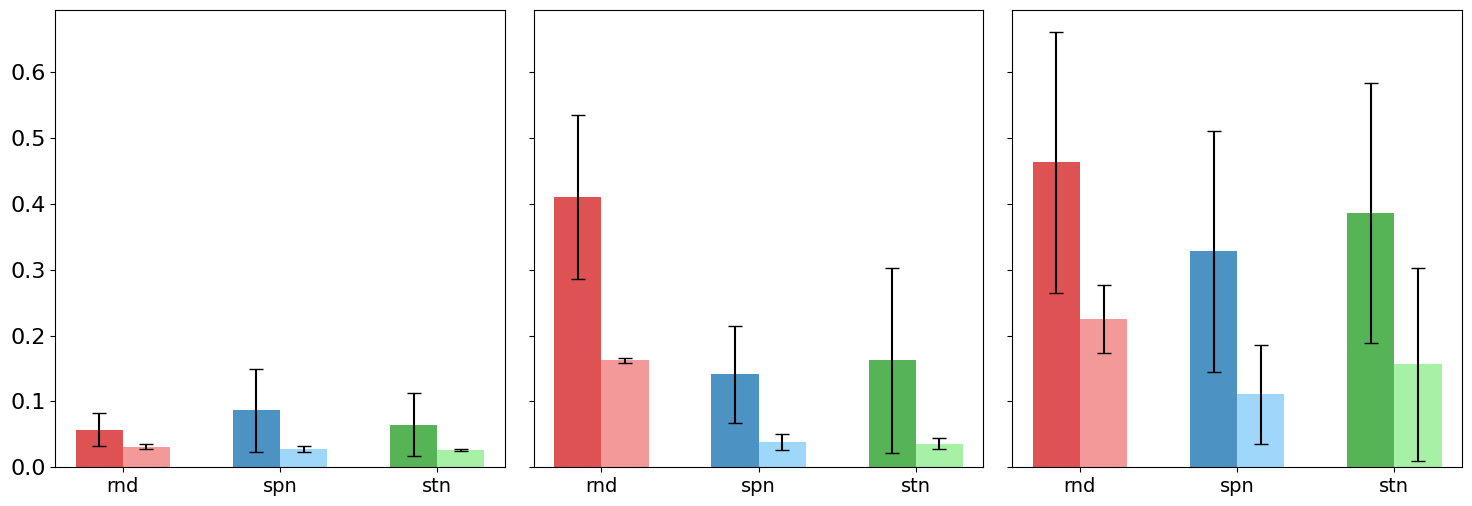

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
pruning_level,0.25,0.25,0.25,0.25,0.25,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.75,0.75,0.75,0.75,0.75
method,rnd,rnd,spn,spn,stn,stn,rnd,rnd,spn,spn,stn,stn,rnd,rnd,spn,spn,stn,stn
type,original,resample,original,resample,original,resample,original,resample,original,resample,original,resample,original,resample,original,resample,original,resample
mean,0.056727,0.031316,0.086562,0.028367,0.064698,0.026132,0.41028,0.162423,0.141264,0.039037,0.162246,0.035784,0.46272,0.225111,0.327696,0.11057,0.386185,0.156103
std,0.025148,0.003757,0.063126,0.004446,0.047367,0.002135,0.124312,0.003402,0.073885,0.01216,0.140227,0.008247,0.19841,0.050952,0.183204,0.074749,0.196988,0.146677


In [35]:

def preprocess_data(df):
    """
    Preprocess the data: melt it and extract method, type, and pruning level.

    Args:
        df (pd.DataFrame): Original DataFrame.

    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    df_melted = df.melt(var_name="category", value_name="value")
    df_melted["method"] = df_melted["category"].apply(lambda x: x.split('_')[1])
    df_melted["type"] = df_melted["category"].apply(lambda x: x.split('_')[-2])
    df_melted["pruning_level"] = df_melted["category"].apply(lambda x: x.split('_')[-1])
    return df_melted

def summarize_data_by_pruning_level_method_type(df_melted):
    """
    Summarize the data by grouping at three levels: pruning level, method, and type.

    Args:
        df_melted (pd.DataFrame): Preprocessed DataFrame.

    Returns:
        pd.DataFrame: Summary DataFrame grouped by pruning level, method, and type.
    """
    summary = df_melted.groupby(["pruning_level", "method", "type"]).agg(
        mean=("value", "mean"),
        std=("value", "std")
    ).reset_index()
    return summary

def plot_summary_by_pruning_level_method_type(summary, fname):
    """
    Plot the summarized data grouped by pruning level, method, and type.

    Args:
        summary (pd.DataFrame): Summary DataFrame with mean and std for each group.
    """
    # Set default font sizes for all elements in the plot
    plt.rc('font', size=16)          # Controls default text size
    plt.rc('axes', titlesize=16)     # Controls title size of axes
    plt.rc('axes', labelsize=16)     # Controls x and y label size
    plt.rc('xtick', labelsize=16)    # Controls x-axis tick label size
    plt.rc('ytick', labelsize=16)    # Controls y-axis tick label size
    plt.rc('legend', fontsize=16)    # Controls legend font size
    plt.rc('figure', titlesize=16)   # Controls figure title size

    '''
    pruning_levels = sorted(summary["pruning_level"].unique())
    methods = summary["method"].unique()
    types = summary["type"].unique()

    fig, axes = plt.subplots(1, len(pruning_levels), figsize=(15, 6), sharey=True)

    
    for i, pruning_level in enumerate(pruning_levels):
        ax = axes[i]
        level_data = summary[summary["pruning_level"] == pruning_level]
        x = np.arange(len(methods))  # Group positions
        width = 0.3  # Bar width

        for j, t in enumerate(types):
            type_data = level_data[level_data["type"] == t]
            means = type_data["mean"]
            stds = type_data["std"]
            ax.bar(x + j * width - width / 2, means, width, yerr=stds, label=f"{t}", capsize=5, alpha=0.8)

        #ax.set_title(f"Pruning Level: {pruning_level}")
        ax.set_xticks(x)
        ax.set_xticklabels(methods)
       
        if i == 1:
            ax.set_xlabel("Methods")
            
        if i == 0:
            ax.set_ylabel("Classification Accuracy")
  
    #axes[2].legend(title="Post Pruning")

    plt.tight_layout()
    plt.show()
    '''
    pruning_levels = sorted(summary["pruning_level"].unique())
    methods = summary["method"].unique()
    types = summary["type"].unique()

    # Assign a unique base color for each method
    color_palette = {
        'rnd': ('tab:red', 'lightcoral'),
        'spn': ('tab:blue', 'lightskyblue'),
        'stn': ('tab:green', 'lightgreen')
    }

    fig, axes = plt.subplots(1, len(pruning_levels), figsize=(5 * len(pruning_levels), 6), sharey=True)

    for i, pruning_level in enumerate(pruning_levels):
        ax = axes[i]
        level_data = summary[summary["pruning_level"] == pruning_level]
        x = np.arange(len(methods))
        width = 0.3

        for j, method in enumerate(methods):
            for k, t in enumerate(types):
                type_data = level_data[(level_data["method"] == method) & (level_data["type"] == t)]
                if not type_data.empty:
                    means = type_data["mean"]
                    stds = type_data["std"]
                    shade = color_palette[method][0] if t == 'original' else color_palette[method][1]
                    ax.bar(
                        x[j] + k * width - width / 2,
                        means,
                        width,
                        yerr=stds,
                        label=f"{method}_{t}" if i == 0 else "",
                        capsize=5,
                        alpha=0.8,
                        color=shade
                    )

        #ax.set_title(f"Pruning Level: {pruning_level}", fontsize=16)
        ax.set_xticks(x)
        ax.set_xticklabels(methods, fontsize=14)
        #ax.set_xlabel("Methods", fontsize=14)
        #if i == 0:
            #ax.set_ylabel("Classification Accuracy", fontsize=14)

    # Single legend outside the plot
    handles, labels = axes[0].get_legend_handles_labels()
    unique_labels = {label: handle for handle, label in zip(handles, labels)}
    #fig.legend(unique_labels.values(), unique_labels.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(unique_labels), fontsize=14)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
    fig.savefig(fname)

# File path to the dataset (replace with your actual file path)
#file_path = '/mnt/data/abalone_classification_summary_results.csv'
folder = "result_retrain4\\"
dataset = "Lazer"
results_folder = folder + dataset
df = pd.read_csv(results_folder+"_summary_results.csv") 
#df = load_data(file_path)
df_melted = preprocess_data(df)
summary = summarize_data_by_pruning_level_method_type(df_melted)
print("Summary Data by Pruning Level, Method, and Type:")

plot_summary_by_pruning_level_method_type(summary, results_folder +'_avg perf_plot.svg')
summary.T

,mse_stn_original_0.25,mse_stn_resample_0.25,mse_stn_original_0.50,mse_stn_resample_0.50,mse_stn_original_0.75,mse_stn_resample_0.75,mse_spn_original_0.25,mse_spn_resample_0.25,mse_spn_original_0.50,mse_spn_resample_0.50,mse_spn_original_0.75,mse_spn_resample_0.75,mse_rnd_original_0.25,mse_rnd_resample_0.25,mse_rnd_original_0.50,mse_rnd_resample_0.50,mse_rnd_original_0.75,mse_rnd_resample_0.75
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,36.325459,36.776903,35.023622,35.816273,27.275591,31.448819,36.887139,37.107612,34.330709,35.606299,27.889764,28.776903,21.412073,27.133858,20.341207,24.755906,19.475066,23.826772
std,4.498221,4.443785,4.610371,4.475034,7.248390,8.512395,4.183065,4.388937,5.112656,4.779362,8.138732,8.173918,7.902797,3.153175,7.308393,6.226076,7.049571,6.751373
min,20.000000,20.157480,22.204724,23.464567,10.393701,11.968504,21.889764,20.787402,19.842520,20.157480,12.125984,11.968504,9.291339,18.740157,11.968504,11.968504,11.968504,11.968504
25%,35.039370,38.188976,31.496063,34.842520,25.314961,27.007874,37.992126,38.622047,30.314961,33.503937,25.669291,24.448819,12.637795,28.661417,14.645669,20.000000,12.637795,16.692913
50%,38.503937,38.740157,36.850394,37.716535,28.661417,34.330709,38.740157,38.740157,36.062992,37.952756,28.661417,28.661417,21.417323,28.661417,20.000000,28.661417,15.590551,28.661417
75%,38.740157,38.897638,38.503937,38.740157,30.551181,38.700787,38.740157,38.897638,38.346457,38.740157,34.094488,36.338583,28.661417,28.661417,28.661417,28.661417,28.661417,28.661417
max,39.527559,39.055118,39.370079,39.842520,38.740157,38.897638,39.055118,39.842520,39.527559,39.842520,39.055118,39.055118,37.007874,28.661417,28.661417,28.661417,28.661417,28.661417


In [34]:
data = np.genfromtxt('data/abalone/abalone.csv',delimiter=',')
name = "abalone"
hidden = 12
input = 8 #input
output = 1
train_ratio = 0.6



#np.random.shuffle(data)
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)
traindata = data[: int(train_ratio * data.shape[0])]
testdata = data[int(train_ratio * data.shape[0]): ]
print(traindata[:,8])

[0.5        0.21428571 0.28571429 ... 0.17857143 0.17857143 0.17857143]


In [20]:

def prune(name,traindata, testdata, problem_type, network_structure):
    results_folder = "result_abelation/"+ name 
    
    error_type = ""
    pos_weights = []
    resultstn = []
    resultspn = []
    resultrand = []
    count = 1
    #pos_weights = np.array(pos_weights)
    
    figs, axs = plt.subplots(1,3, figsize=(15,3), sharey=True)
    figs2, axs2 =  plt.subplots(4,3, figsize=(15,10), sharey=True)
    for p_w in os.listdir(results_folder):
        if p_w.startswith("pos_w") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
            # Prints only text file present in My Folder
            print(p_w)
            
            w = np.loadtxt(results_folder+ "\\"+p_w)

        
            if count == 3:
                print(count)
                #break
                
                
            signal_to_noise = np.empty(w.shape[1])
            signal_plus_noise = np.empty(w.shape[1])
            random_noise = np.empty(w.shape[1])
            
            for i in range(w.shape[1]):
                signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
                signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])
                random_noise[i] = np.random.random()
        
            bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)
            mse_bnn = np.empty(w.shape[0])
            
            
            
            sorted_index = np.argsort(signal_to_noise)
            sorted_index_spn = np.argsort(signal_plus_noise)
            
            new_pos = np.copy(w)
            new_pos_spn = np.copy(w)
            new_pos_random = np.copy(w)
    
            plotter = 0
            graph_counter = 0

            print(int(0.75*sorted_index.shape[0]))
            
            prunn_limit = math.ceil(0.75*sorted_index.shape[0])

            mse_list = np.empty(prunn_limit)
            mse_list_spn = np.empty(prunn_limit)
            mse_list_rand = np.empty(prunn_limit)

            
            for j in range(prunn_limit):
                
                mse_bnn = np.empty(w.shape[0])
                new_pos[:, sorted_index[j]] = 0
                fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
                
        
                mse_bnn_spn = np.empty(w.shape[0])
                new_pos_spn[:, sorted_index_spn[j]] = 0 
                fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
                
        
                ##############
                mse_bnn_rand = np.empty(w.shape[0])
                new_pos_random[:, j] = 0
                fx_rand, prob_rand = bnn_model.evaluate_proposal(testdata, new_pos_random.mean(axis=0))
            
                if problem_type == "regression":
                    #print("Regression")
                    error_type = "RMSE"
                    mse_bnn = squared_error(fx, testdata[:, -1])
                    mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
                    mse_bnn_rand = squared_error(fx_rand, testdata[:, -1])
                else:
                    #print("Classification")
                    error_type = "Accuracy"
                    mse_bnn = accuracy(fx, testdata[:, -1])
                    mse_bnn_spn = accuracy(fx_spn, testdata[:, -1])
                    mse_bnn_rand = accuracy(fx_rand, testdata[:, -1])

       
                    
                
                if j == int(plotter * sorted_index.shape[0]):
                    #plt.figure(figsize=(10,3))
                    axs2[graph_counter,0].plot(fx,'-g', label = 'STN',  alpha=0.3)
                    axs2[graph_counter,1].plot(fx_spn,'-b', label = 'SPN',  alpha=0.3) 
                    axs2[graph_counter,2].plot(fx_rand,'-m', label = 'Random',  alpha=0.3)

                    axs2[graph_counter,0].plot(testdata[:, -1],'-k', label = 'Actual',alpha=0.5)
                    axs2[graph_counter,1].plot(testdata[:, -1],'-k', label = 'Actual',alpha=0.5)
                    axs2[graph_counter,2].plot(testdata[:, -1],'-k', label = 'Actual', alpha=0.5)
                    
                    plotter += 0.25
                    graph_counter += 1
                #plt.legend()
                    
                
                mse_list[j] = round(np.mean(mse_bnn), 10)
                mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
                mse_list_rand[j] = round(np.mean(mse_bnn_rand), 10)

            outres_db = open(results_folder + '/stn_perf_list.txt',"a+")
            outres_db.write( p_w[6:7]+','+p_w[8:12]+','+p_w[13:16]+','+','.join(map(str, mse_list)) + "\n")

            outres_db = open(results_folder + '/spn_perf_list.txt',"a+")
            outres_db.write(p_w[6:7]+','+p_w[8:12]+','+p_w[13:16]+ ','+','.join(map(str, mse_list_spn)) + "\n")
            
            outres_db = open(results_folder + '/rand_perf_list.txt',"a+")
            outres_db.write(p_w[6:7]+','+p_w[8:12]+','+p_w[13:16]+','+','.join(map(str, mse_list_rand)) + "\n")
             
            figs2.savefig('result_abelation/' + name +'_predictions.svg')
            #plt.clf()

            print("mse BNN")
            print(mse_bnn)
            #print(np.unique(fx[-2:]))
            #print(np.unique(testdata[-2:, -1]))
            #print(np.sqrt(mean_squared_error(fx, testdata[:, -1])))
            
            print('signal to noise: ')  
            print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
            print(np.percentile(signal_to_noise, 0), 
                  np.percentile(signal_to_noise, 10), 
                  np.percentile(signal_to_noise, 25), 
                  np.percentile(signal_to_noise, 50),
                  np.percentile(signal_to_noise, 75))
                  
            print('signal plus noise: ')
            print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
            print(np.percentile(signal_plus_noise, 0), 
                  np.percentile(signal_plus_noise, 10), 
                  np.percentile(signal_plus_noise, 25), 
                  np.percentile(signal_plus_noise, 50),
                  np.percentile(signal_plus_noise, 75))
            
            print('random  prunning ')
            print(f"{mse_list_rand[0] : .3g} & {mse_list_rand[int(mse_list_rand.shape[0] * 0.1)] : .3g} & {mse_list_rand[int(mse_list_rand.shape[0] * 0.25)] : .3g} & {mse_list_rand[int(mse_list_rand.shape[0] * 0.5)] : .3g} & {mse_list_rand[int(mse_list_rand.shape[0] * 0.75)] : .3g}")
            print(np.percentile(random_noise, 0), 
                  np.percentile(random_noise, 10), 
                  np.percentile(random_noise, 25), 
                  np.percentile(random_noise, 50),
                  np.percentile(random_noise, 75))
    
            
            resultstn.append(mse_list)
            resultspn.append(mse_list_spn)
            resultrand.append(mse_list_rand)
            
            axs[0].plot(mse_list, '--g',  alpha=0.15)
            axs[1].plot(mse_list_spn,'--b',  alpha=0.15)
            axs[2].plot(mse_list_rand,'--m',  alpha=0.15)
            # plt.legend()
            # plt.xlabel('number of weights removed')
            # plt.ylabel('MSE')
            count = count + 1
            # plt.savefig('result/' + name + "/signal_plus" + str(count))

    
    figs.suptitle((name +' Dataset').upper(), fontsize=16)
    
    num_ticks = prunn_limit  # Length of the data (assuming all results arrays are the same length)
    
    axs[0].plot(np.asarray(resultstn).mean(axis=0), '-g', alpha=1, label= error_type+" signal to noise'")
    axs[0].fill_between(range(len(resultstn[0])) , np.asarray(resultstn).max(axis=0),np.asarray(resultstn).min(axis=0), alpha=0.05, color='green' )
    #axs[0].grid()
    axs[0].set_ylabel(error_type)
    
    axs[0].set_xticks([0, num_ticks * 0.33, num_ticks * 0.66, num_ticks* 0.95 ])
    axs[0].set_xticklabels(['0%', '25%', '50%', '75%'])
    # Set the x-axis limit to 75%
    axs[0].set_xlim(0, num_ticks)
    #axs[0].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(resultstn[0])-1))
    
    axs[1].plot(np.asarray(resultspn).mean(axis=0), '-b', alpha=1, label= error_type + " signal plus noise'")
    axs[1].fill_between(range(len(resultspn[0])) , np.asarray(resultspn).max(axis=0),np.asarray(resultspn).min(axis=0), alpha=0.05, color='blue' )
    #axs[1].grid()
    #axs[1].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(resultspn[0])-1))
    axs[1].set_xticks([0, num_ticks * 0.33, num_ticks * 0.66, num_ticks* 0.95 ])
    axs[1].set_xticklabels(['0%', '25%', '50%', '75%'])
    # Set the x-axis limit to 75%
    axs[1].set_xlim(0, num_ticks)
    
    axs[2].plot(np.asarray(resultrand).mean(axis=0), '-r', alpha=1, label= error_type + " random'")
    axs[2].fill_between(range(len(resultrand[0])) , np.asarray(resultrand).max(axis=0),np.asarray(resultrand).min(axis=0), alpha=0.05, color='magenta' )
    #axs[2].grid()
    #axs[2].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(resultrand[0])-1))
    axs[2].set_xticks([0, num_ticks * 0.33, num_ticks * 0.66, num_ticks* 0.95 ])
    axs[2].set_xticklabels(['0%', '25%', '50%', '75%'])
    # Set the x-axis limit to 75%
    axs[2].set_xlim(0, num_ticks)
    
    figs.savefig('result_abelation/' + name +'_std.svg')
    
    
    fig, ax = plt.subplots(1,1, figsize=(10,3))
    ax.plot(np.asarray(resultstn).mean(axis=0)[:], '-g', alpha=1, label= " signal to noise")
    ax.plot(np.asarray(resultspn).mean(axis=0), '-b', alpha=1, label=" signal plus noise")
    ax.plot(np.asarray(resultrand).mean(axis=0), '-m', alpha=1, label=" random")
    #ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(resultstn[0])-1))
    # Setting the x-ticks at 25% intervals
    
    ax.set_xticks([0, num_ticks * 0.33, num_ticks * 0.66, num_ticks * 0.95])
    ax.set_xticklabels(['0%', '25%', '50%', '75%'])
    # Set the x-axis limit to 75%
    ax.set_xlim(0, num_ticks)

    #ax.grid()
    ax.set_ylabel(error_type)
    fig.legend(loc='upper right')
    # plt.clf()
    fig.savefig('result_abelation/' + name +'_plot.svg')
    




In [236]:
df2 = df.describe()
df2.iloc[[1,2]].T

,mean,std
stn_stn_0.25,0.102437,0.019461
stn_stn_resample_0.25,0.078049,0.000576
stn_stn_0.50,0.163108,0.063892
stn_stn_resample_0.50,0.078870,0.000555
stn_stn_0.75,0.268904,0.130443
stn_stn_resample_0.75,0.081458,0.001806
stn_spn_0.25,0.104664,0.031429
stn_spn_resample_0.25,0.077982,0.000486
stn_spn_0.50,0.182720,0.105953
stn_spn_resample_0.50,0.078445,0.000572


In [32]:

def prune(name,traindata, testdata, problem_type, network_structure):
    results_folder = "result1/"+ name 
    
    error_type = ""
    pos_weights = []
    for p_w in os.listdir(results_folder):
        if p_w.startswith("pos_w") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
            # Prints only text file present in My Folder
            print(p_w)
            
            pos_weights.append(np.loadtxt(results_folder+ "\\"+p_w))
    
    pos_weights = np.array(pos_weights)
    
    figs, axs = plt.subplots(1,3, figsize=(10,2), sharey=True)
    
    
    resultstn = []
    resultspn = []
    resultrand = []
    count = 1
    #print(pos_weights)
    for w in pos_weights:
        
        signal_to_noise = np.empty(w.shape[1])
        signal_plus_noise = np.empty(w.shape[1])
    
        for i in range(w.shape[1]):
            signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
            signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])
    
        bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)
        mse_bnn = np.empty(w.shape[0])
        
        mse_list = np.empty(signal_to_noise.shape[0])
        mse_list_spn = np.empty(signal_plus_noise.shape[0])
        mse_list_rand = np.empty(signal_plus_noise.shape[0])
        
        sorted_index = np.argsort(signal_to_noise)
        sorted_index_spn = np.argsort(signal_plus_noise)
        
        new_pos = np.copy(w)
        new_pos_spn = np.copy(w)
        new_pos_random = np.copy(w)
    
        for j in range(sorted_index.shape[0]):
            
            mse_bnn = np.empty(w.shape[0])
            new_pos[:, sorted_index[j]] = 0
            fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
            
    
            mse_bnn_spn = np.empty(w.shape[0])
            new_pos_spn[:, sorted_index_spn[j]] = 0 
            fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
            
    
            ##############
            mse_bnn_rand = np.empty(w.shape[0])
            new_pos_random[:, j] = 0
            fx_rand, prob_rand = bnn_model.evaluate_proposal(testdata, new_pos_random.mean(axis=0))
        
            if problem_type == "regression":
                #print("Regression")
                error_type = "MSE"
                mse_bnn = squared_error(fx, testdata[:, -1])
                mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
                mse_bnn_rand = squared_error(fx_rand, testdata[:, -1])
            else:
                #print("Classification")
                error_type = "Accuracy"
                mse_bnn = accuracy(fx, testdata[:, -1])
                mse_bnn_spn = accuracy(fx_spn, testdata[:, -1])
                mse_bnn_rand = accuracy(fx_rand, testdata[:, -1])
            
            
            mse_list[j] = round(np.mean(mse_bnn), 10)
            mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
            mse_list_rand[j] = round(np.mean(mse_bnn_rand), 10)
            
        print('signal to noise: ')  
        print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
        print(np.percentile(signal_to_noise, 0), 
              np.percentile(signal_to_noise, 10), 
              np.percentile(signal_to_noise, 25), 
              np.percentile(signal_to_noise, 50),
              np.percentile(signal_to_noise, 75))
              
        print('signal plus noise: ')
        print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
        print(np.percentile(signal_plus_noise, 0), 
              np.percentile(signal_plus_noise, 10), 
              np.percentile(signal_plus_noise, 25), 
              np.percentile(signal_plus_noise, 50),
              np.percentile(signal_plus_noise, 75))

        
        resultstn.append(mse_list)
        resultspn.append(mse_list_spn)
        resultrand.append(mse_list_rand)
        
        axs[0].plot(mse_list, '--g',  alpha=0.3)
        axs[1].plot(mse_list_spn,'--b',  alpha=0.3)
        axs[2].plot(mse_list_rand,'--r',  alpha=0.3)
        # plt.legend()
        # plt.xlabel('number of weights removed')
        # plt.ylabel('MSE')
        count = count + 1
        # plt.savefig('result/' + name + "/signal_plus" + str(count))

    
    figs.suptitle((name +' Dataset').upper(), fontsize=16)
    
    axs[0].plot(np.asarray(resultstn).mean(axis=0), '-g', alpha=1, label= error_type+" signal to noise'")
    axs[0].fill_between(range(len(resultstn[0])) , np.asarray(resultstn).max(axis=0),np.asarray(resultstn).min(axis=0), alpha=0.1, color='green' )
    axs[0].grid()
    axs[0].set_ylabel(error_type)
    
    axs[1].plot(np.asarray(resultspn).mean(axis=0), '-b', alpha=1, label= error_type + " signal plus noise'")
    axs[1].fill_between(range(len(resultspn[0])) , np.asarray(resultspn).max(axis=0),np.asarray(resultspn).min(axis=0), alpha=0.1, color='blue' )
    axs[1].grid()
    
    axs[2].plot(np.asarray(resultrand).mean(axis=0), '-r', alpha=1, label= error_type + " random'")
    axs[2].fill_between(range(len(resultrand[0])) , np.asarray(resultrand).max(axis=0),np.asarray(resultrand).min(axis=0), alpha=0.1, color='red' )
    axs[2].grid()
    #axs.figure.savefig('result/' + name +'_std.svg')
    
    
    fig, ax = plt.subplots(1,1, figsize=(10,3))
    ax.plot(np.asarray(resultstn).mean(axis=0), '-g', alpha=1, label= " signal to noise")
    ax.plot(np.asarray(resultspn).mean(axis=0), '-b', alpha=1, label=" signal plus noise")
    ax.plot(np.asarray(resultrand).mean(axis=0), '-r', alpha=1, label=" random")
    ax.grid()
    ax.set_ylabel(error_type)
    fig.legend(loc='lower right')
    # plt.clf()
    plt.savefig('result1/' + name +'_plot.svg')
    



for dataset in os.listdir("result1\\"):
    
 
    if dataset in [""]  :
        print(dataset)
    else:
        
        if dataset.find(".") == -1:
            print(dataset)
            
            traindata, testdata, problem_type, network_structure = get_dataset_details(dataset)
    
            prune(dataset,traindata, testdata, problem_type, network_structure )
           
#prune(name,cwd,traindata, testdata)


abalone


FileNotFoundError: data/abalone/abalone.data not found.

# Lazer

signal to noise: 
 0.0249 &  0.0488 &  0.052 &  0.102 &  0.47
0.4434278796061639 1.220580558369531 3.1963030780245765 5.201443554723433 11.781060020149072
signal plus noise: 
 0.027 &  0.0515 &  0.0679 &  0.135 &  0.669
0.1982886608931941 0.5312278826574592 0.8342193973526937 1.939423765737109 3.345044308824108
signal to noise: 
 0.0226 &  0.0301 &  0.0761 &  0.221 &  0.0997
0.5981220878847712 1.0376713734040834 1.7970619825450682 5.9245911680794 13.012656825146554
signal plus noise: 
 0.0217 &  0.0199 &  0.0635 &  0.211 &  0.0997
0.30929468417394795 0.4972440692994701 0.6703972539770519 1.227371939207097 3.0455602578075482
signal to noise: 
 0.0262 &  0.0667 &  0.072 &  0.339 &  0.679
0.07764708379098342 1.3307182960863737 2.6215264780517793 7.5500704753055015 11.576931191906848
signal plus noise: 
 0.0262 &  0.0729 &  0.0715 &  0.296 &  0.194
0.38973477767379444 0.7522208892989581 1.3755479799376538 2.39513545603618 4.779242458315078
signal to noise: 
 0.0256 &  0.0257 &  0.0226 &  0

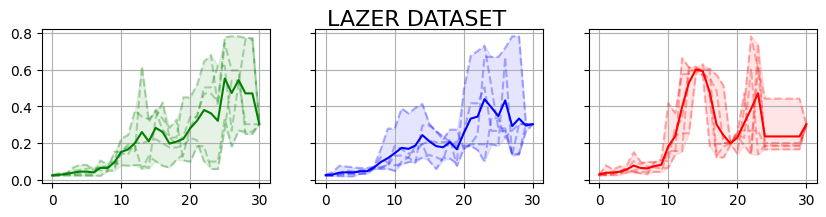

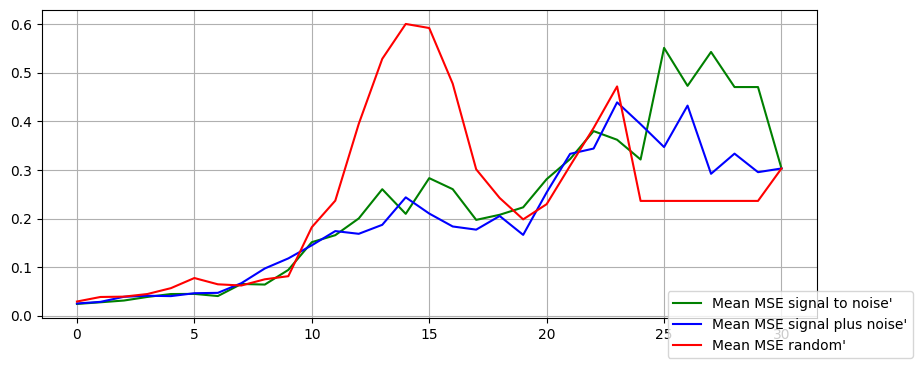

In [15]:



pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 

pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

figs, axs = plt.subplots(1,3, figsize=(10,2), sharey=True)


resultstn = []
resultspn = []
resultrand = []
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    mse_list_rand = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)
    new_pos_random = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
        mse_list[j] = round(np.mean(mse_bnn), 10)

        mse_bnn_spn = np.empty(w.shape[0])
        new_pos_spn[:, sorted_index_spn[j]] = 0 
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)

        ##############
        mse_bnn_rand = np.empty(w.shape[0])
        new_pos_random[:, j] = 0
        fx_rand, prob_rand = bnn_model.evaluate_proposal(testdata, new_pos_random.mean(axis=0))
        mse_bnn_rand = squared_error(fx_rand, testdata[:, -1])
        mse_list_rand[j] = round(np.mean(mse_bnn_rand), 10)
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))

    resultstn.append(mse_list)
    resultspn.append(mse_list_spn)
    resultrand.append(mse_list_rand)
    
    axs[0].plot(mse_list, '--g',  alpha=0.3)
    axs[1].plot(mse_list_spn,'--b',  alpha=0.3)
    axs[2].plot(mse_list_rand,'--r',  alpha=0.3)
    # plt.legend()
    # plt.xlabel('number of weights removed')
    # plt.ylabel('MSE')
    count = count + 1
    # plt.savefig('result/' + name + "/signal_plus" + str(count))



axs[0].plot(np.asarray(resultstn).mean(axis=0), '-g', alpha=1, label="Mean MSE signal to noise'")
axs[0].fill_between(range(len(resultstn[0])) , np.asarray(resultstn).max(axis=0),np.asarray(resultstn).min(axis=0), alpha=0.1, color='green' )
axs[0].grid()

axs[1].plot(np.asarray(resultspn).mean(axis=0), '-b', alpha=1, label="Mean MSE signal plus noise'")
axs[1].fill_between(range(len(resultspn[0])) , np.asarray(resultspn).max(axis=0),np.asarray(resultspn).min(axis=0), alpha=0.1, color='blue' )
axs[1].grid()

axs[2].plot(np.asarray(resultrand).mean(axis=0), '-r', alpha=1, label="Mean MSE random'")
axs[2].fill_between(range(len(resultrand[0])) , np.asarray(resultrand).max(axis=0),np.asarray(resultrand).min(axis=0), alpha=0.1, color='red' )
axs[2].grid()



fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(np.asarray(resultstn).mean(axis=0), '-g', alpha=1, label="Mean MSE signal to noise'")
ax.plot(np.asarray(resultspn).mean(axis=0), '-b', alpha=1, label="Mean MSE signal plus noise'")
ax.plot(np.asarray(resultrand).mean(axis=0), '-r', alpha=1, label="Mean MSE random'")
ax.grid()
fig.legend(loc='lower right')

# plt.clf()


 0.0249,  0.0488,  0.052, 0.102,  0.47
0.4434278796061639 1.220580558369531 3.1963030780245765 5.201443554723433 11.781060020149072
 0.0226,  0.0301,  0.0761, 0.221,  0.0997
0.5981220878847712 1.0376713734040834 1.7970619825450682 5.9245911680794 13.012656825146554
 0.0262,  0.0667,  0.072, 0.339,  0.679
0.07764708379098342 1.3307182960863737 2.6215264780517793 7.5500704753055015 11.576931191906848
 0.0256,  0.0257,  0.0226, 0.382,  0.0593
0.27003365007815733 1.887956346993015 3.153724833553899 7.665066247707641 13.164234320750271
 0.0236,  0.0238,  0.106, 0.373,  0.503
0.10287222656831978 0.3906744555614979 2.201153710406677 5.827264543019824 11.213909227801611


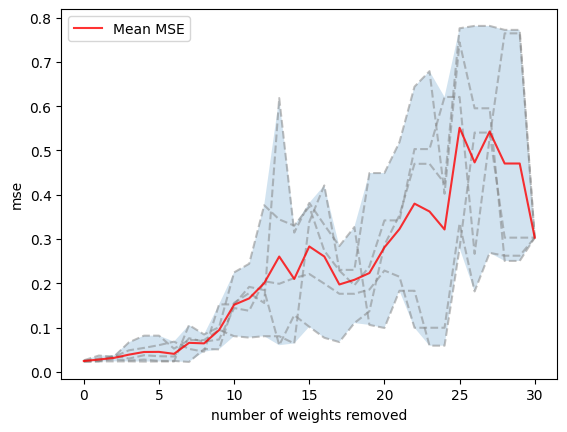

In [39]:
results = []

for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        
#     fig, ax1 = plt.subplots()

#     ax1.set_xlabel('number of weights removed')
#     ax1.set_ylabel('mse')
#     ax1.plot(mse_list, color = 'blue')

#     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#     ax2.set_ylabel('signal to noise ratio')  
#     ax2.plot(np.sort(signal_to_noise), color = 'red')

#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
#     plt.show()
#     plt.clf()

    print(f"{mse_list[0] : .3g}, {mse_list[int(mse_list.shape[0] * 0.1)] : .3g}, {mse_list[int(mse_list.shape[0] * 0.25)] : .3g},{mse_list[int(mse_list.shape[0] * 0.5)] : .3g}, {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    results.append(mse_list) 
    plt.plot(mse_list, '--', alpha=0.5, color='gray')
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    #plt.show()
    #plt.clf()
plt.plot(np.asarray(results).mean(axis=0), '-r', alpha=0.8, label="Mean MSE")
plt.fill_between(range(len(results[0])) , np.asarray(results).max(axis=0),np.asarray(results).min(axis=0), alpha=0.2 )
plt.legend()

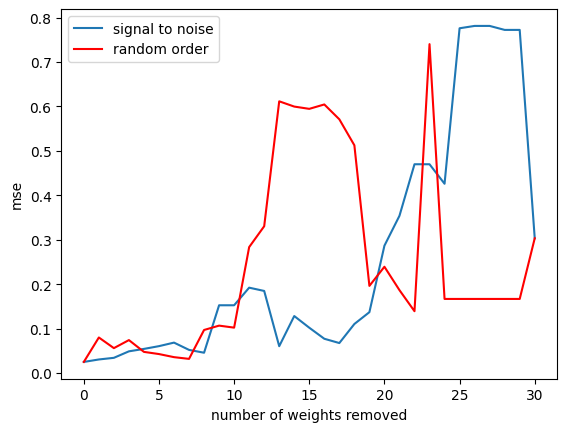

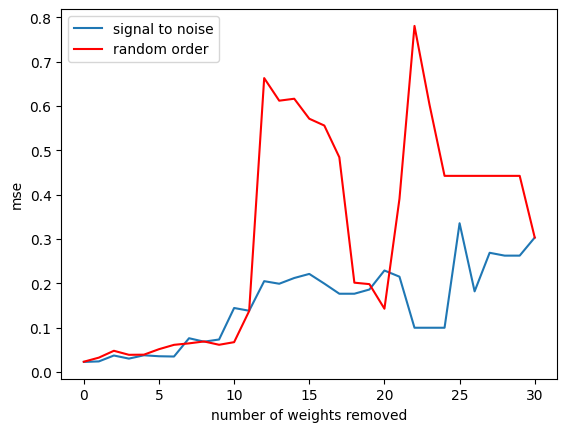

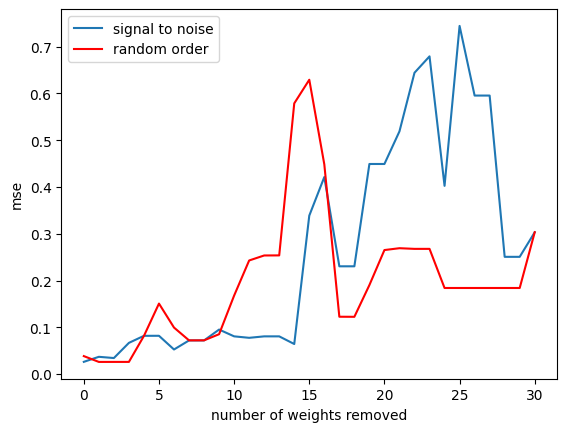

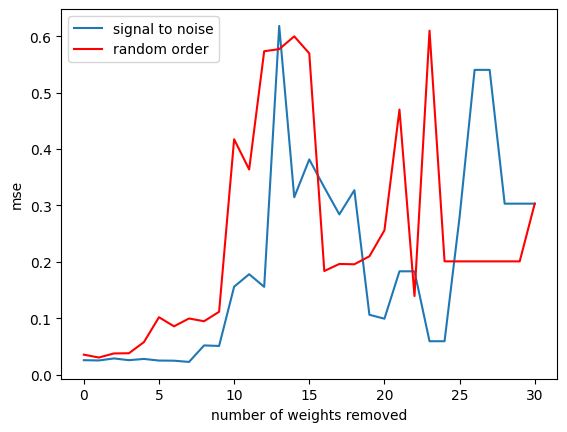

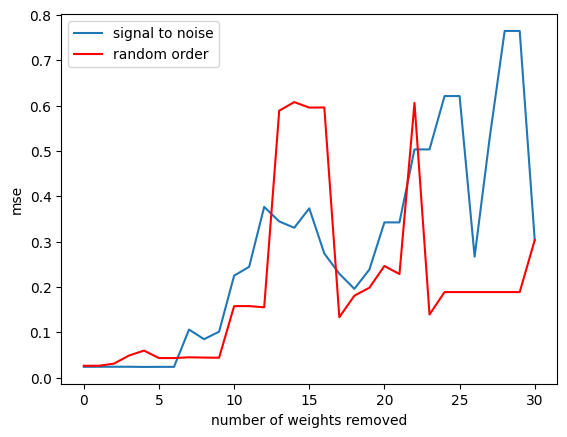

<Figure size 640x480 with 0 Axes>

In [92]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="upper left")
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.savefig('result/' + name + "/snr" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


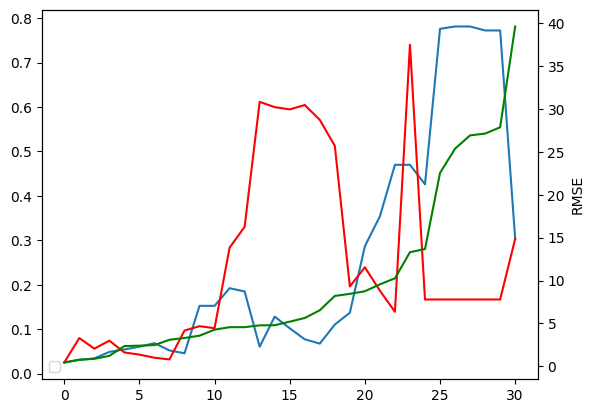

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

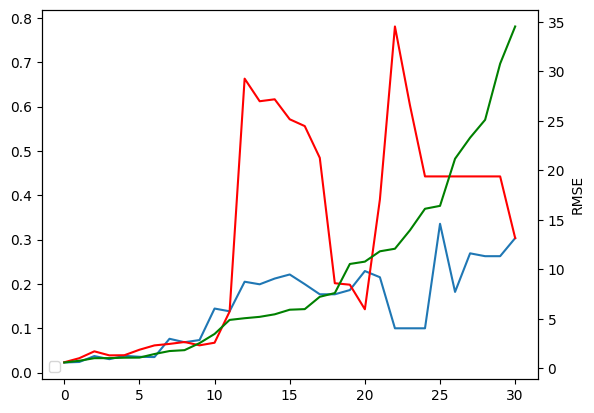

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

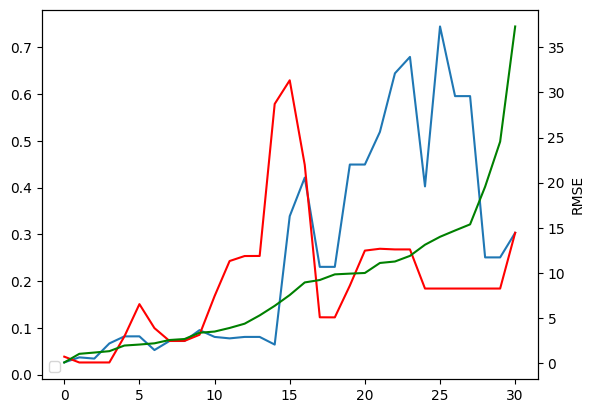

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

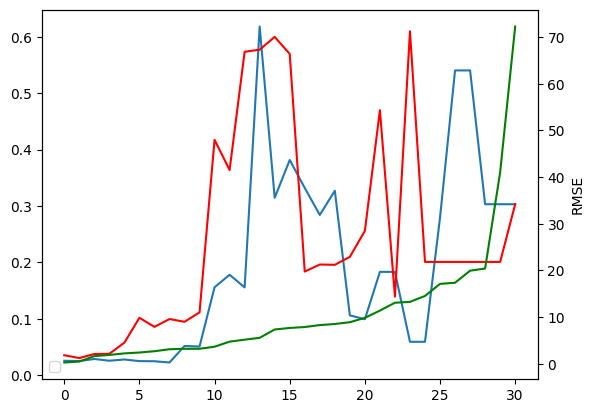

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

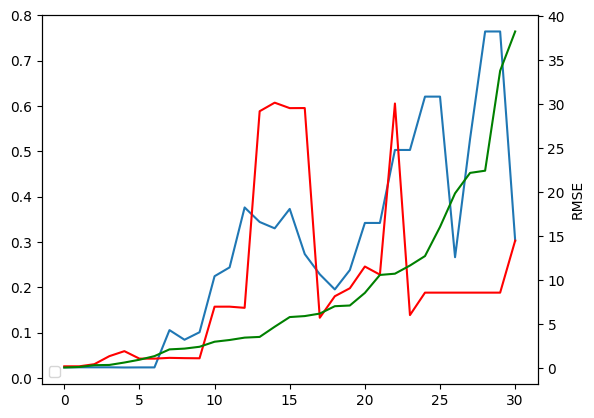

<Figure size 640x480 with 0 Axes>

In [30]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
    fig, ax = plt.subplots(1, 1)
    ax.plot(mse_list, label = "signal to noise")
    ax.plot(mse_list2, color = 'red', label = "random order")
    
    ax2 = ax.twinx()
    ax2.plot(np.sort(signal_to_noise), color = 'green')
    
    
    plt.legend(loc="lower left")
    # plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('RMSE')
    # plt.savefig('result/' + name + "/snr" + str(imgcount))
    plt.show()
    plt.clf()    
    
    count = count + 1

# Sunspot

In [8]:
name = "Sunspot"
traindata = np.loadtxt("data/Sunspot/train.txt")
testdata = np.loadtxt("data/Sunspot/test.txt") 

pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 
pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

 0.0132,  0.0145,  0.0746, 0.147,  0.254
0.10748998521311165 1.3396630830241991 2.824229130021758 6.479622522953406 14.768546047885172


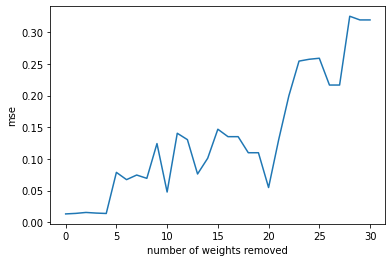

 0.014,  0.0397,  0.0543, 0.134,  0.284
0.9161304692702769 1.6631220456028148 3.1490058982234954 7.905757507066941 12.339393816210576


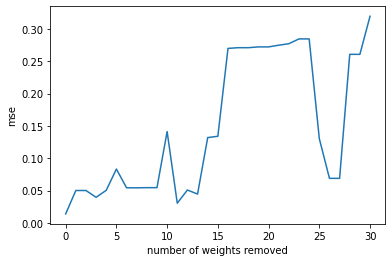

 0.0132,  0.0362,  0.0435, 0.136,  0.285
0.6153162409730254 1.0745731788241204 2.6623707111709702 8.39332905156995 14.259163430652343


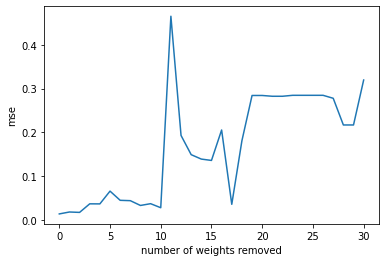

 0.0131,  0.0145,  0.0519, 0.18,  0.246
0.1766466939561286 1.4964898000115596 2.2833251172242477 7.718964093135038 11.586676667525417


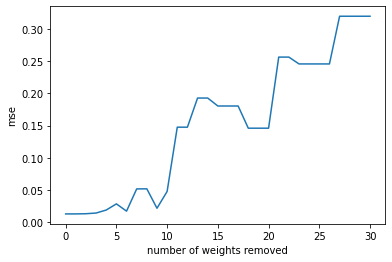

 0.015,  0.0776,  0.0564, 0.029,  0.268
0.013406537414329114 1.1007256038606208 4.081224300165654 8.221766980089177 14.465468572757857


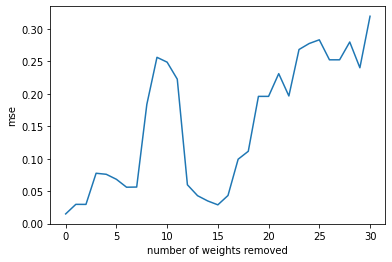

<Figure size 432x288 with 0 Axes>

In [17]:
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
    print(f"{mse_list[0] : .3g}, {mse_list[int(mse_list.shape[0] * 0.1)] : .3g}, {mse_list[int(mse_list.shape[0] * 0.25)] : .3g},{mse_list[int(mse_list.shape[0] * 0.5)] : .3g}, {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    plt.plot(mse_list)
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.show()
    plt.clf()

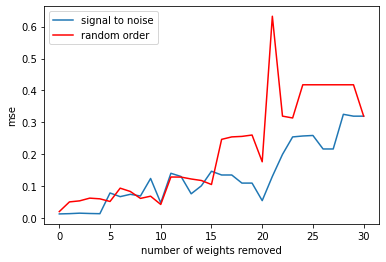

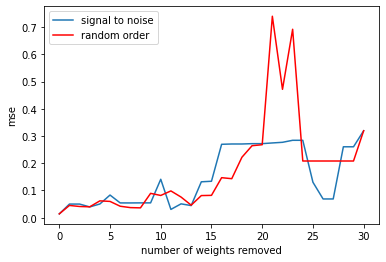

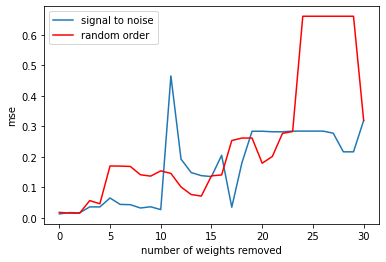

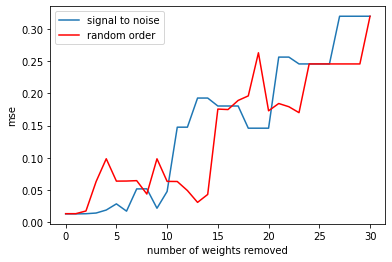

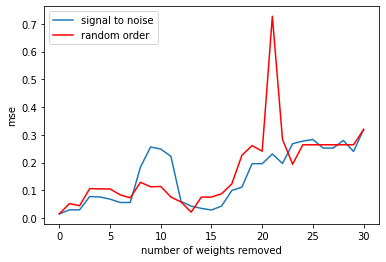

<Figure size 432x288 with 0 Axes>

In [35]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="upper left")
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    # plt.savefig('result/' + name + "/snr" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

signal to noise: 
 0.0132 &  0.0145 &  0.0746 &  0.147 &  0.254
0.10748998521311165 1.3396630830241991 2.824229130021758 6.479622522953406 14.768546047885172
signal plus noise: 
 0.0132 &  0.0185 &  0.0197 &  0.0617 &  0.164
0.16484823248218936 0.41709504392294594 0.6124608185758891 1.241984516099339 2.308812482061528


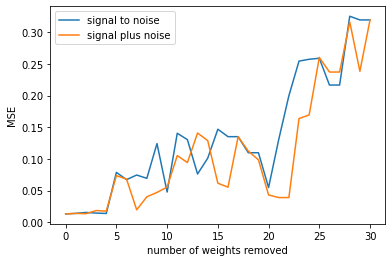

signal to noise: 
 0.014 &  0.0397 &  0.0543 &  0.134 &  0.284
0.9161304692702769 1.6631220456028148 3.1490058982234954 7.905757507066941 12.339393816210576
signal plus noise: 
 0.014 &  0.0828 &  0.0541 &  0.0834 &  0.265
0.23920072132998177 0.5257964791227284 0.8530420577106017 2.1937261904384484 3.7918063215205384


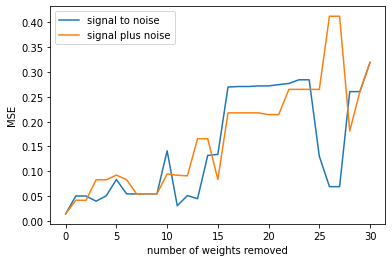

signal to noise: 
 0.0132 &  0.0362 &  0.0435 &  0.136 &  0.285
0.6153162409730254 1.0745731788241204 2.6623707111709702 8.39332905156995 14.259163430652343
signal plus noise: 
 0.0147 &  0.0284 &  0.0687 &  0.259 &  0.118
0.25939937204060953 0.31185479891415 0.8690544009969869 2.119354414445375 3.1424242504692006


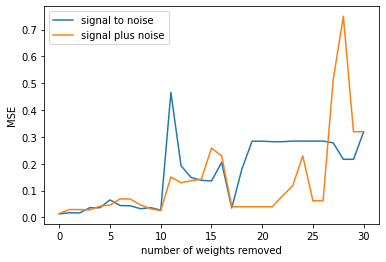

signal to noise: 
 0.0131 &  0.0145 &  0.0519 &  0.18 &  0.246
0.1766466939561286 1.4964898000115596 2.2833251172242477 7.718964093135038 11.586676667525417
signal plus noise: 
 0.0131 &  0.0458 &  0.141 &  0.258 &  0.585
0.1993830863705466 0.4627340515683157 0.7566017357069286 1.426134139938079 3.9936779178930233


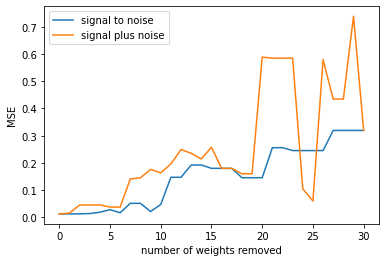

signal to noise: 
 0.015 &  0.0776 &  0.0564 &  0.029 &  0.268
0.013406537414329114 1.1007256038606208 4.081224300165654 8.221766980089177 14.465468572757857
signal plus noise: 
 0.015 &  0.0761 &  0.168 &  0.0334 &  0.262
0.22504346655054175 0.5248097159780778 0.9864870903717498 1.9182448985744718 3.749342573304399


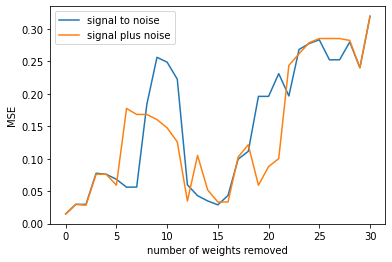

<Figure size 432x288 with 0 Axes>

In [9]:
def squared_error(prediction, actual):
    return (
        np.sqrt(np.sum(np.square(prediction - actual)) / prediction.shape[0])
    ) 
    
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
        mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('MSE')
    plt.savefig('result/' + name + "/signal_plus" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

# Abalone


In [10]:
data = np.genfromtxt('data/abalone/abalone.data',delimiter=',')
name = "abalone"

np.random.shuffle(data)
scaler = MinMaxScaler()
scaler.fit(data)
train_ratio = 0.8
traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]


pos_run1 = np.loadtxt('result/abalone/pos_w_0.txt')
pos_run2 = np.loadtxt('result/abalone/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/abalone/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/abalone/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/abalone/pos_w_4.txt') 

pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

0.8


In [88]:
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([8, 12, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
    print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    plt.plot(mse_list)
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.show()
    plt.clf()

ValueError: cannot reshape array of size 31 into shape (8,12)

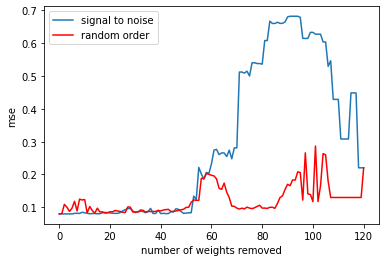

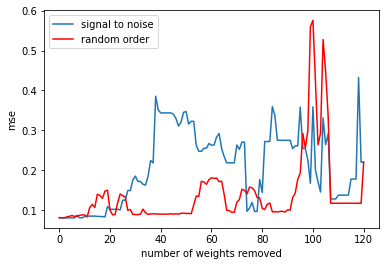

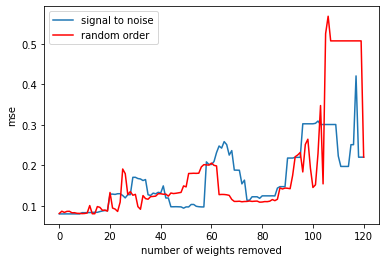

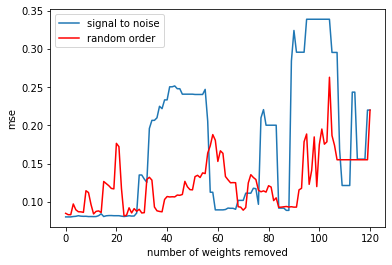

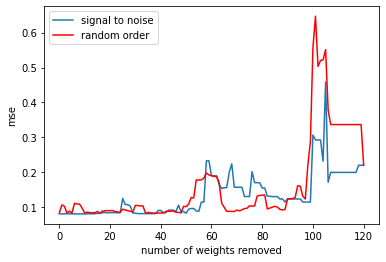

<Figure size 432x288 with 0 Axes>

In [48]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([8, 12, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="upper left")
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.savefig('result/' + name + "/snr" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

signal to noise: 
 0.0773 &  0.0776 &  0.0823 &  0.224 &  0.673
0.012248358680827326 1.9430602230379739 4.184981117123232 8.29850698530295 13.121514282549278
signal plus noise: 
 0.0773 &  0.0801 &  0.0788 &  0.22 &  0.148
0.06764238983325985 0.22911867798558 0.4739033579339562 0.8377251979645336 1.3609066396776692


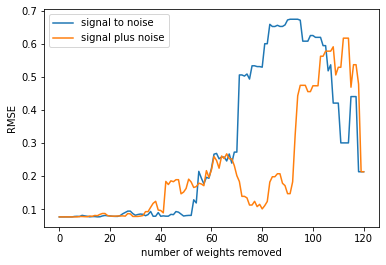

signal to noise: 
 0.0785 &  0.0831 &  0.187 &  0.261 &  0.271
0.0933622916476971 1.439774652572963 3.478145571443645 7.983851182403434 12.59440273357692
signal plus noise: 
 0.0785 &  0.0826 &  0.0809 &  0.146 &  0.131
0.10312643030950662 0.3096045744357574 0.5533415885487735 0.9754880024614254 1.5940433698210117


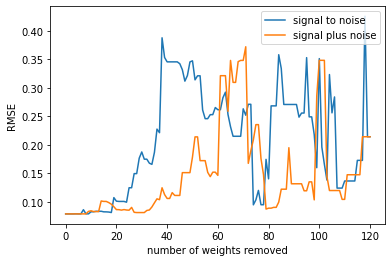

signal to noise: 
 0.078 &  0.081 &  0.166 &  0.206 &  0.224
0.2758399746033365 1.0303523529974397 2.97149757103126 6.116782903597289 13.16241757391093
signal plus noise: 
 0.0781 &  0.0797 &  0.0867 &  0.0978 &  0.519
0.10161497751922402 0.25883048442796336 0.4241894645277017 0.8319500677057894 1.510406602179528


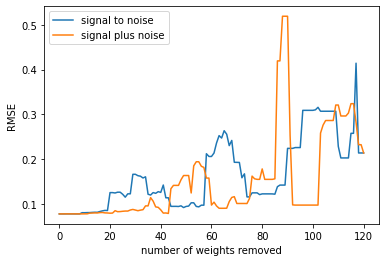

signal to noise: 
 0.0781 &  0.0785 &  0.135 &  0.0885 &  0.327
0.19387247371533295 1.7819150147292724 3.5227940900833437 7.318004565021097 13.757342809645138
signal plus noise: 
 0.0781 &  0.0796 &  0.0892 &  0.118 &  0.26
0.11503459815389047 0.27723485664060354 0.47810617862452753 0.9630464628509298 1.433652483344944


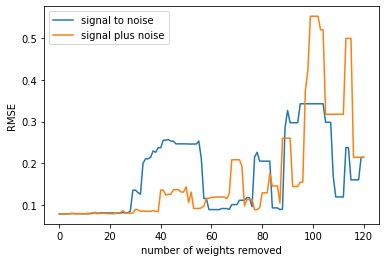

signal to noise: 
 0.0786 &  0.0788 &  0.0825 &  0.189 &  0.122
0.03604588162660755 1.074402874064198 3.198058694200487 6.833489277337711 13.32061662360806
signal plus noise: 
 0.0785 &  0.0787 &  0.126 &  0.138 &  0.106
0.09093788743165154 0.21223992199680625 0.5177904837459157 0.9186699558074218 1.518881092733642


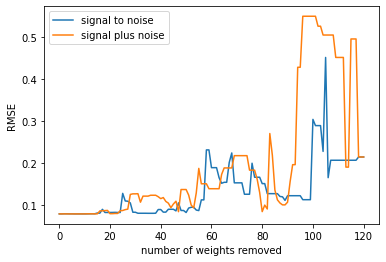

<Figure size 432x288 with 0 Axes>

In [11]:
def squared_error(prediction, actual):
    return (
        np.sqrt(np.sum(np.square(prediction - actual)) / prediction.shape[0])
    ) 
    
imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([8, 12, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
        mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('RMSE')
    # plt.savefig('result/' + name + "/signal_plus" + str(imgcount))
    plt.show()
    plt.clf()
    imgcount = imgcount + 1

# Iris

In [5]:
data  = np.genfromtxt('data/iris.csv',delimiter=';')
np.random.seed(123)
np.random.shuffle(data)
classes = data[:,4].reshape(data.shape[0],1)-1
features = data[:,0:4] #Normalizing Data

for k in range(4):
    mean = np.mean(features[:,k])
    dev = np.std(features[:,k])
    features[:,k] = (features[:,k]-mean)/dev
    train_ratio = 0.7 #choose
    indices = np.random.permutation(features.shape[0])
    traindata = np.hstack([features[indices[:np.int(train_ratio*features.shape[0])],:],classes[indices[:np.int(train_ratio*features.shape[0])],:]])
    testdata = np.hstack([features[indices[np.int(train_ratio*features.shape[0])]:,:],classes[indices[np.int(train_ratio*features.shape[0])]:,:]])
    activation = True

name = "Iris"
pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 
pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

In [5]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([8, 12, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="upper left")
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.savefig('result/' + name + "/snr" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

(25000, 99)


 98.39,  98.39,  95.16, 95.16,  29.03
0.09538254351894423 0.4352124659577025 1.004486775545263 2.1338690332202357 4.079292807194468


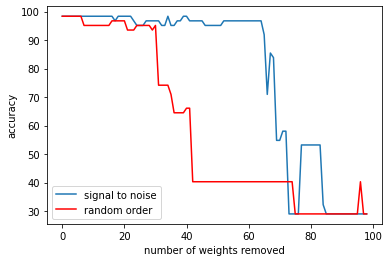

 98.39,  98.39,  98.39, 96.77,  96.77
0.10638814900322646 0.41775830799087765 1.1467156169175101 2.1596462673308015 4.547003546093595


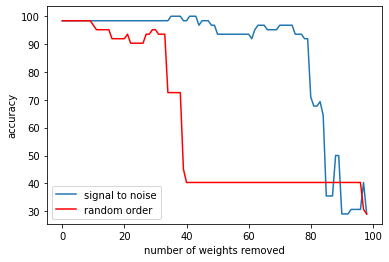

 98.39,  98.39,  98.39, 93.55,  64.52
0.0017728091734104969 0.5051680291119646 1.0690941381688859 2.1699758742823776 4.075838834555204


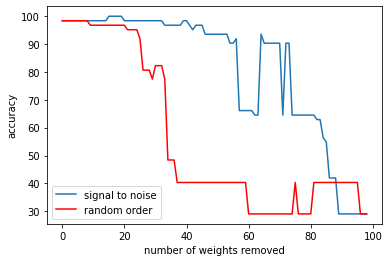

 100.00,  100.00,  100.00, 91.94,  25.81
0.07502599506186279 0.3162178374284231 1.1340088864708964 2.5145812428467162 4.837850765086573


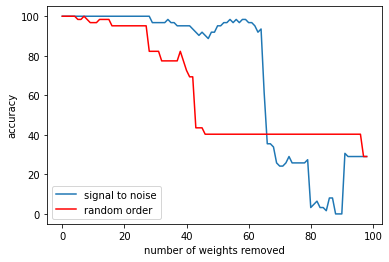

 98.39,  98.39,  96.77, 96.77,  91.94
0.05115153104736897 0.7020758837906247 1.2477992149709582 2.144367602074287 3.3299318133814664


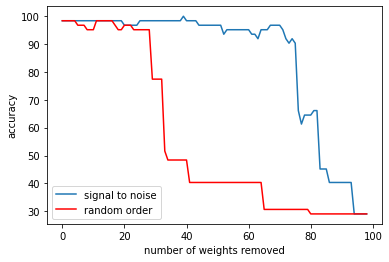

<Figure size 432x288 with 0 Axes>

In [53]:
imgcount=1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 12, 3], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)
    
    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
    
        
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = accuracy(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
    print(f"{mse_list[0] : .2f}, {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.25)] : .2f},{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="lower left")
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    plt.savefig('result/' + name + "/snr" + str(imgcount))
    imgcount=imgcount+1
    plt.show()
    plt.clf()

signal to noise: 
 98.39\% &  98.39\% &  95.16\% & 95.16\% &  29.03
0.09538254351894423 0.4352124659577025 1.004486775545263 2.1338690332202357 4.079292807194468
signal plus noise: 
 98.39\% &  95.16\% &  95.16\% & 90.32\% &  29.03
0.9296052681856339 1.7088652063787604 2.4107403847237454 3.7495069315867213 5.614256854961668


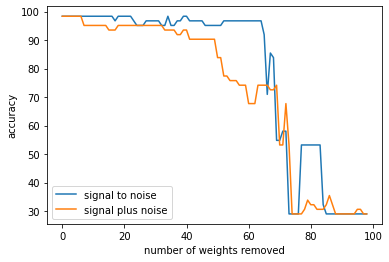

signal to noise: 
 98.39\% &  98.39\% &  98.39\% & 96.77\% &  96.77
0.10638814900322646 0.41775830799087765 1.1467156169175101 2.1596462673308015 4.547003546093595
signal plus noise: 
 98.39\% &  96.77\% &  93.55\% & 91.94\% &  72.58
0.9463440519409986 1.696890196863461 2.520352514186082 3.907748123993332 6.22132146219769


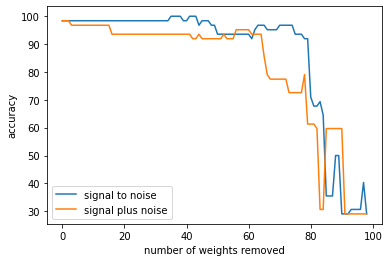

signal to noise: 
 98.39\% &  98.39\% &  98.39\% & 93.55\% &  64.52
0.0017728091734104969 0.5051680291119646 1.0690941381688859 2.1699758742823776 4.075838834555204
signal plus noise: 
 98.39\% &  95.16\% &  95.16\% & 91.94\% &  88.71
0.7776640545266273 1.8598157371583612 2.2113517591252814 3.865663396890597 6.933499959029778


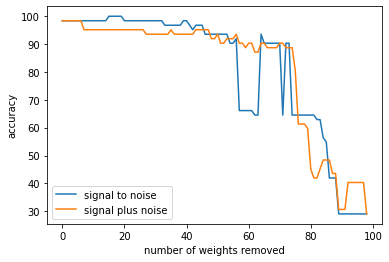

signal to noise: 
 100.00\% &  100.00\% &  100.00\% & 91.94\% &  25.81
0.07502599506186279 0.3162178374284231 1.1340088864708964 2.5145812428467162 4.837850765086573
signal plus noise: 
 100.00\% &  98.39\% &  96.77\% & 91.94\% &  30.65
0.7520911216587521 1.5885535982966723 2.599266423131966 4.254949481443401 6.722835106039843


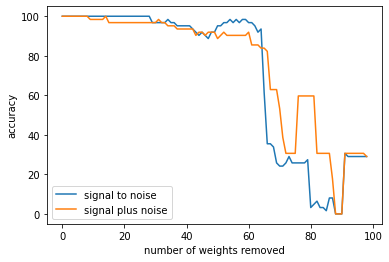

signal to noise: 
 98.39\% &  98.39\% &  96.77\% & 96.77\% &  91.94
0.05115153104736897 0.7020758837906247 1.2477992149709582 2.144367602074287 3.3299318133814664
signal plus noise: 
 98.39\% &  96.77\% &  96.77\% & 91.94\% &  67.74
0.8429650995859229 1.8454521079388706 2.5108820593480488 3.3232483434674847 5.344116900086616


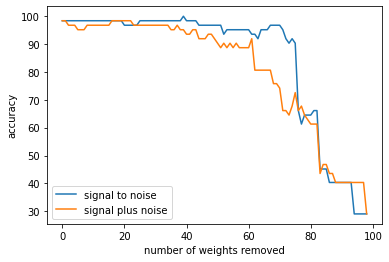

<Figure size 432x288 with 0 Axes>

In [16]:
imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([4, 12, 3], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
        mse_bnn_spn = accuracy(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.25)] : .2f}\% &{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .2f}\% &{mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.savefig('result/' + name + "/signal_plus" + str(imgcount))
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    plt.show()
    plt.clf()
    imgcount = imgcount + 1

No handles with labels found to put in legend.


 98.39,  98.39,  95.16, 95.16,  29.03
0.09538254351894423 0.4352124659577025 1.004486775545263 2.1338690332202357 4.079292807194468


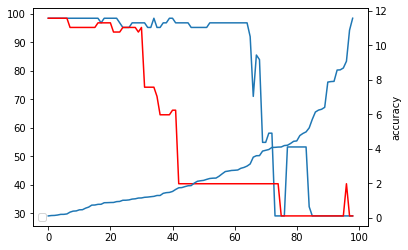

No handles with labels found to put in legend.


 98.39,  98.39,  98.39, 96.77,  96.77
0.10638814900322646 0.41775830799087765 1.1467156169175101 2.1596462673308015 4.547003546093595


<Figure size 432x288 with 0 Axes>

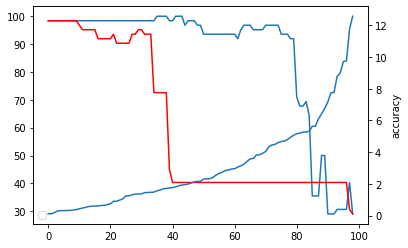

No handles with labels found to put in legend.


 98.39,  98.39,  98.39, 93.55,  64.52
0.0017728091734104969 0.5051680291119646 1.0690941381688859 2.1699758742823776 4.075838834555204


<Figure size 432x288 with 0 Axes>

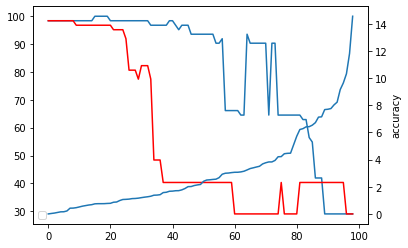

No handles with labels found to put in legend.


 100.00,  100.00,  100.00, 91.94,  25.81
0.07502599506186279 0.3162178374284231 1.1340088864708964 2.5145812428467162 4.837850765086573


<Figure size 432x288 with 0 Axes>

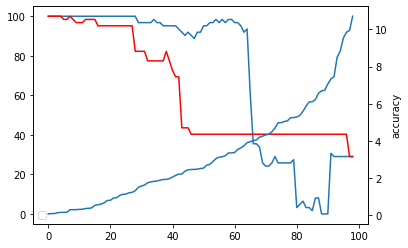

No handles with labels found to put in legend.


 98.39,  98.39,  96.77, 96.77,  91.94
0.05115153104736897 0.7020758837906247 1.2477992149709582 2.144367602074287 3.3299318133814664


<Figure size 432x288 with 0 Axes>

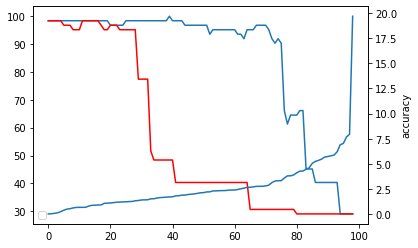

<Figure size 432x288 with 0 Axes>

In [71]:
imgcount=1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 12, 3], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)
    
    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
    
        
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = accuracy(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
    print(f"{mse_list[0] : .2f}, {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.25)] : .2f},{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    fig, ax = plt.subplots(1, 1)
    ax.plot(mse_list, label = "signal to noise")
    ax.plot(mse_list2, color = 'red', label = "random order")
    
    ax2 = ax.twinx()
    ax2.plot(np.sort(signal_to_noise))
    
    
    plt.legend(loc="lower left")
    # plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    # plt.savefig('result/' + name + "/snr" + str(imgcount))
    imgcount=imgcount+1
    plt.show()
    plt.clf()

# Ionosphere

In [12]:
name = 'Ionosphere'
traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]

pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 
pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

 95.41,  95.41,  96.33, 66.06,  22.02
0.0005106411260476903 0.39889787858629966 1.0843875833558347 2.24368092543083 4.039811218723117


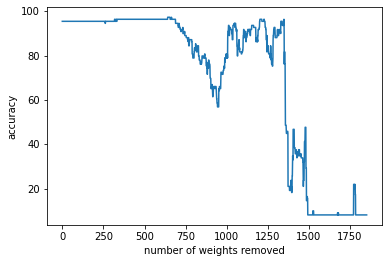

 93.58,  93.58,  94.50, 85.32,  74.31
0.002062117362322161 0.42655032337207005 1.0742195623852424 2.330786710328042 3.9546348186422704


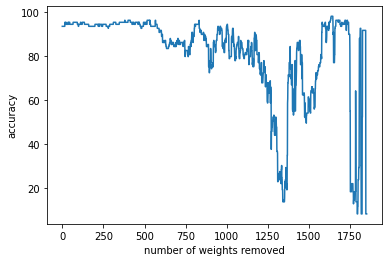

 95.41,  94.50,  88.99, 71.56,  59.63
0.003217943365083239 0.44890638596406274 1.1053841240233384 2.357607690216685 4.159369649621036


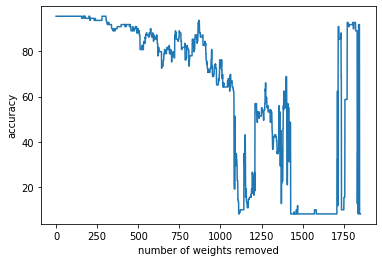

 92.66,  90.83,  96.33, 95.41,  74.31
0.000352140617610085 0.5041149079739973 1.1947195467934886 2.390525479174932 4.300103494485854


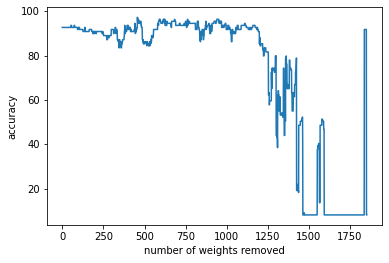

 91.74,  90.83,  93.58, 92.66,  61.47
0.0027212606040309915 0.4325744357930394 1.1120873589090792 2.4779891964543674 4.385261417531039


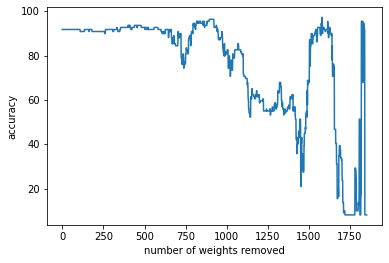

<Figure size 432x288 with 0 Axes>

In [13]:
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
    print(f"{mse_list[0] : .2f}, {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.25)] : .2f},{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
    
    plt.plot(mse_list)
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    plt.show()
    plt.clf()

signal to noise: 
 95.41\% &  95.41\% &  96.33\% & 66.06\% &  22.02
0.0005106411260476903 0.39889787858629966 1.0843875833558347 2.24368092543083 4.039811218723117
signal plus noise: 
 95.41\% &  95.41\% &  97.25\% & 89.91\% &  8.26
0.2208351149673515 0.8651799499992882 1.2352898198863427 1.9678856463677934 3.0103556277126753


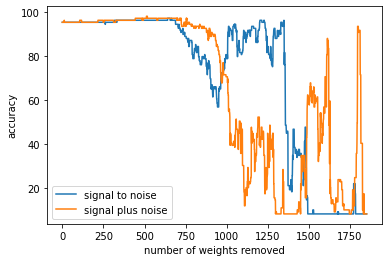

signal to noise: 
 93.58\% &  93.58\% &  94.50\% & 85.32\% &  74.31
0.002062117362322161 0.42655032337207005 1.0742195623852424 2.330786710328042 3.9546348186422704
signal plus noise: 
 93.58\% &  93.58\% &  88.07\% & 86.24\% &  61.47
0.2698816312275969 0.862286201817422 1.2790923981984055 2.036790715023028 3.0732017013080712


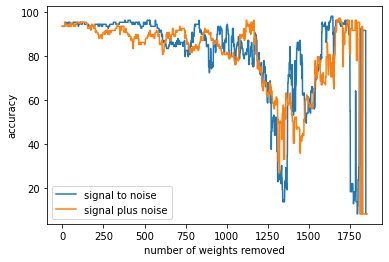

signal to noise: 
 95.41\% &  94.50\% &  88.99\% & 71.56\% &  59.63
0.003217943365083239 0.44890638596406274 1.1053841240233384 2.357607690216685 4.159369649621036
signal plus noise: 
 95.41\% &  95.41\% &  95.41\% & 66.97\% &  56.88
0.2349288070664806 0.8436700987836417 1.282715243460192 2.0432747962593316 2.9846897129816634


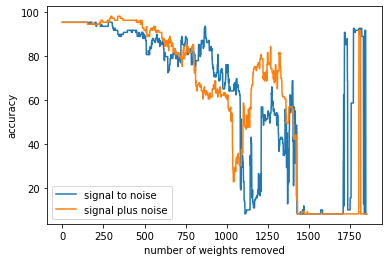

signal to noise: 
 92.66\% &  90.83\% &  96.33\% & 95.41\% &  74.31
0.000352140617610085 0.5041149079739973 1.1947195467934886 2.390525479174932 4.300103494485854
signal plus noise: 
 92.66\% &  89.91\% &  90.83\% & 86.24\% &  8.26
0.27113834358774747 0.8508775211141624 1.2643211611115461 2.0311174094157094 3.046041383941297


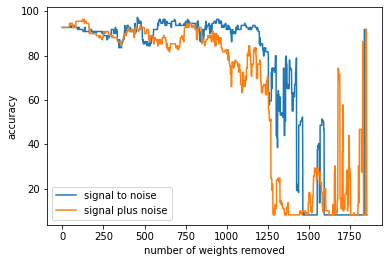

signal to noise: 
 91.74\% &  90.83\% &  93.58\% & 92.66\% &  61.47
0.0027212606040309915 0.4325744357930394 1.1120873589090792 2.4779891964543674 4.385261417531039
signal plus noise: 
 91.74\% &  94.50\% &  94.50\% & 87.16\% &  88.07
0.319844875700198 0.845691277778151 1.2694921479185213 2.088025709929451 3.097434940123863


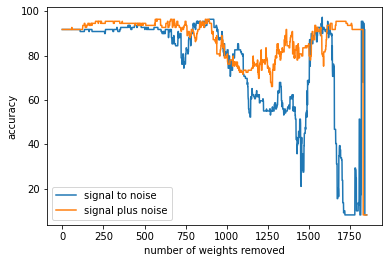

<Figure size 432x288 with 0 Axes>

In [14]:
imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
        mse_bnn_spn = accuracy(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.25)] : .2f}\% &{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .2f}\% &{mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    # plt.savefig('result/' + name + "/signal_plus" + str(imgcount))
    imgcount = imgcount + 1
    plt.show()
    plt.clf()

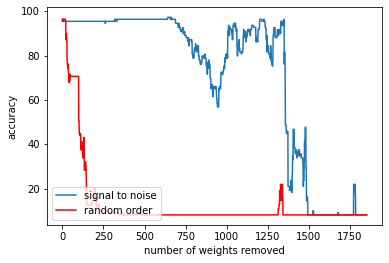

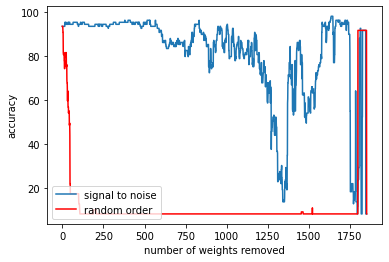

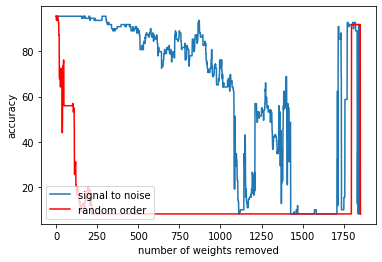

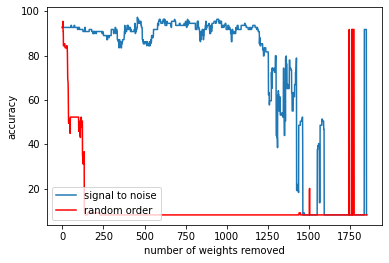

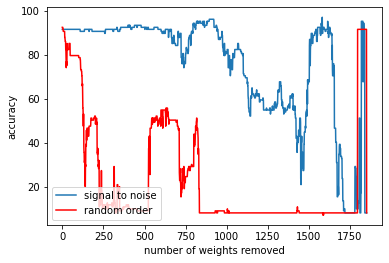

<Figure size 432x288 with 0 Axes>

In [60]:
### removing in order of SNR vs. removing in order of weights

imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

        
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)
    
    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
    
        
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = accuracy(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    
    
    
    plt.legend(loc="lower left")
    # plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    plt.savefig('result/' + name + "/snr" + str(imgcount))
    imgcount=imgcount+1
    plt.show()
    
    plt.clf()

No handles with labels found to put in legend.


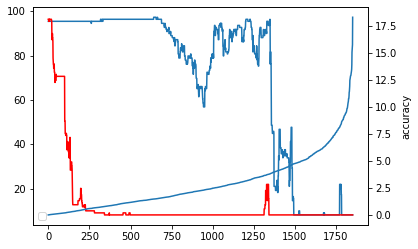

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

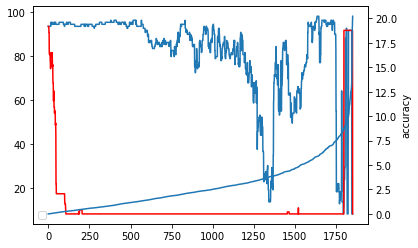

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

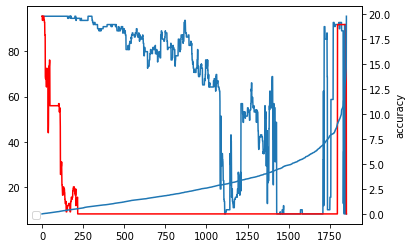

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

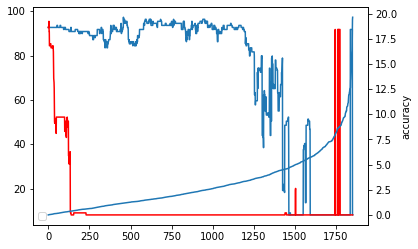

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

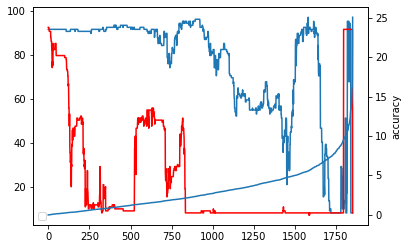

<Figure size 432x288 with 0 Axes>

In [69]:
### removing in order of SNR vs. removing in order of weights

imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

        
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)
    
    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
    
        
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = accuracy(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
    fig, ax = plt.subplots(1, 1)
    ax.plot(mse_list, label = "signal to noise")
    ax.plot(mse_list2, color = 'red', label = "random order")
    
    ax2 = ax.twinx()
    ax2.plot(np.sort(signal_to_noise))
    
    
    plt.legend(loc="lower left")
    # plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    # plt.savefig('result/' + name + "/snr" + str(imgcount))
    imgcount=imgcount+1
    plt.show()
    plt.clf()



array([3.21794337e-03, 1.06800282e-02, 1.08017760e-02, ...,
       1.45610390e+01, 1.46258592e+01, 1.97659867e+01])

# result
---
## signal to noise ratio
* MSE / accuracy are based on testing set.
* weights are pruned by setting them to zero

|  Problem                      | # weights | Error/Accuracy <br /> (full model) | Error/Accuracy <br /> (10% pruned)   | Error/Accuracy <br /> (25% pruned) | Error/Accuracy <br /> (50% pruned) | Error/Accuracy <br /> (75% pruned)
| :---:                         | :---: | :---:                          |   :---:       | :---: |  :---: | :---: |
| Lazer (regression)            |  31  | 0.000492 <br /> 0.000796 <br /> 0.000721 <br /> 0.000521 <br /> 0.000647| 0.00127 <br /> 0.00253 <br /> 0.00106 <br /> 0.000535 <br /> 0.000694 | 0.000817 <br /> 0.00329 <br /> 0.00403 <br /> 0.00189 <br /> 0.0158 | 0.0125 <br /> 0.0778 <br /> 0.00793 <br /> 0.00627 <br /> 0.0105 | 0.0685 <br /> 0.0847 <br /> 0.611 <br /> 0.0269 <br /> 0.00423 
| Sunspot (regression)          |  31  | 0.000174 <br /> 0.000195 <br /> 0.000173 <br /> 0.000172 <br /> 0.000225 | 0.000211 <br /> 0.00157 <br /> 0.00131 <br /> 0.00021 <br /> 0.00603 | 0.00556 <br /> 0.00295 <br /> 0.00189 <br /> 0.00269 <br /> 0.00318 | 0.0216 <br /> 0.0179 <br /> 0.0184 <br /> 0.0325 <br /> 0.000841 | 0.0648 <br /> 0.0809 <br /> 0.081 <br /> 0.0603 <br /> 0.072
| Iris (classification)         |  99  | 98.41% <br /> 98.41% <br /> 98.41 % <br /> 99.21% <br /> 97.62% | 98.41% <br /> 98.41% <br /> 97.62% <br /> 99.21% <br /> 98.41%  | 97.62% <br /> 97.62% <br /> 97.62% <br /> 99.21% <br /> 97.62% | 96.83% <br /> 98.41% <br /> 98.41% <br /> 96.83% <br /> 98.41% | 37.3% <br /> 98.41% <br /> 58.73% <br /> 27.78% <br /> 94.44%|
| Ionosphere (classification)   | 1852 | 95.41% <br /> 93.58% <br /> 95.41% <br /> 92.66% <br /> 91.74%| 95.41% <br /> 93.58% <br /> 94.5% <br /> 90.83% <br /> 90.83% | 96.33% <br /> 94.5% <br /> 88.99% <br /> 96.33% <br /> 93.58% | 66.06% <br /> 85.32% <br /> 71.56% <br /> 95.41% <br /> 92.66% | 22.02% <br /> 74.31% <br /> 59.63% <br /> 74.31% <br /> 61.47%|


## signal plus noise ratio
|  Problem                      | # weights | Error/Accuracy <br /> (full model) | Error/Accuracy <br /> (10% pruned)   | Error/Accuracy <br /> (25% pruned) | Error/Accuracy <br /> (50% pruned) | Error/Accuracy <br /> (75% pruned)
| :---:                         | :---: | :---:                          |   :---:       | :---: |  :---: | :---: |
| Ionosphere (classification)   | 1852 | 95.41% <br /> 93.58% <br /> 95.41% <br /> 92.66% <br /> 91.74%| 95.41% <br /> 93.58% <br /> 95.41% <br /> 89.91% <br /> 94.5% | 97.25% <br /> 88.07% <br /> 95.41% <br /> 90.83% <br /> 94.5% | 89.91% <br /> 86.24% <br /> 66.97% <br /> 86.24% <br /> 87.16% | 8.26% <br /> 61.47% <br /> 56.88% <br /> 8.26% <br /> 88.07%|


## signal to noise ratio - BayesiaN auto encoder
|  Problem                      | # weights | Error/Accuracy <br /> (full model) | Error/Accuracy <br /> (10% pruned)   | Error/Accuracy <br /> (25% pruned) | Error/Accuracy <br /> (50% pruned) | Error/Accuracy <br /> (75% pruned)
| :---:                         | :---: | :---:                          |   :---:       | :---: |  :---: | :---: |
| Lazer (regression)            |  31  | 0.000492 <br /> 0.000796 <br /> 0.000721 <br /> 0.000521 <br /> 0.000647|


## signal plus noise ratio - BayesiaN auto encoder
|  Problem                      | # weights | Error/Accuracy <br /> (full model) | Error/Accuracy <br /> (10% pruned)   | Error/Accuracy <br /> (25% pruned) | Error/Accuracy <br /> (50% pruned) | Error/Accuracy <br /> (75% pruned)
| :---:                         | :---: | :---:                          |   :---:       | :---: |  :---: | :---: |
| Lazer (regression)            |  31  | 0.000492 <br /> 0.000796 <br /> 0.000721 <br /> 0.000521 <br /> 0.000647|
